Models Built
Without PCA
- Logistic Regression
- Decision Tree - With and Without Hypertuning
- Random Forest - With and Without Hypertuning
- XGBoost - Without hypertuning - Randomsearch for hypertuning was running for over 4 hours and Kernel had to be   interrupted

WITH PCA
- Logistic Regression
- Decision Tree - With and Without Hypertuning
- Random Forest - With and Without Hypertuning

Scoring : Tried to increase recall

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb  
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

In [363]:
#Reading the Csv and assigning to Datafgrame
df = pd.read_csv("train.csv",encoding='unicode_escape')

In [364]:
#Checking the dataframe shape and composition
print(df.shape)
df.head()

(69999, 172)


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [365]:
# Checking tail
df.tail()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
69994            6/30/2014            7/31/2014            8/31/2014   15.760   
69995            6/30/2014            7/31/2014            8/31/2014  160.083   
69996            6/30/2014            7/31/2014            8/31/2014  372.088   
69997            6/30/2014            7/31/2014            8/31/2014  238.575   
69998            6/30/2014            7/31/2014            8/31/2014  168.269   

        arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
69994  410.924  329.136         0.00         7.36        10.93          0.00   
69995  289.129  265.772       116.54       196.46       232.63         49.53   
69996  258.374  279.782        77.13        68.44        78.44        335.54   
69997  245.414  145.062        14.01         7.64         6.71         30.34   
69998   42.815  167.961         0.00         0.00         0.00          0.00   

       offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
69994        488.46        381.64          14.96            0.0   
69995         96.28         48.06           0.00            0.0   
69996        227.94        263.84           0.00            0.0   
69997         16.68         12.56          25.06            0.0   
69998          0.00          0.00           0.00            0.0   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
69994            0.0           0.00            0.0            0.0   
69995            0.0           0.00            0.0            0.0   
69996            0.0           0.00            0.0            0.0   
69997            0.0           4.58            0.0            0.0   
69998            0.0           0.00            0.0            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
69994              0.00              2.44              7.19              0.00   
69995              7.18             30.11              9.06             37.53   
69996             77.13             44.28             78.44            143.19   
69997             10.88              7.64              6.71              4.44   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
69994             60.64             89.66              0.00              0.00   
69995             73.84             47.34              2.01              0.00   
69996             82.58            138.26            142.58            141.26   
69997              6.66              8.84              7.99              1.45   
69998              0.00              0.00              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
69994              0.00               0.0              2.43              0.86   
69995              0.00               0.0              4.01              0.00   
69996            125.58               0.0              4.10              0.00   
69997              2.86               0.0              0.00              0.00   
69998              0.00               0.0              0.00              0.00   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
69994          0.00         63.09         96.86              0.00   
69995         46.73        103.96         56.41            109.36   
69996        362.91        268.13        342.29              0.00   
69997         23.33         15.76   

In [366]:
# Checking for Dtype and other info
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [367]:
# A look at the data statistics 
df.describe(include='all')

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [368]:
#Clean Up - 1
##Uniques
df.nunique()

id                          69999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
arpu_6                      61615
arpu_7                      61425
arpu_8                      60194
onnet_mou_6                 20057
onnet_mou_7                 20076
onnet_mou_8                 19725
offnet_mou_6                26254
offnet_mou_7                26139
offnet_mou_8                25995
roam_ic_mou_6                5306
roam_ic_mou_7                4240
roam_ic_mou_8                4252
roam_og_mou_6                6568
roam_og_mou_7                5305
roam_og_mou_8                5215
loc_og_t2t_mou_6            11491
loc_og_t2t_mou_7            11359
loc_og_t2t_mou_8            11296
loc_og_t2m_mou_6            17848
loc_og_t2m_mou_7            17641
loc_og_t2m_mou_8            17616
loc_og_t2f_mou

In [369]:
#Removing columns where the variables are the same for all rows
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index
df=df.drop(cols_to_drop, axis=1)
cols_to_drop
# Explantion for dropping columns
#Circle ID: Is a identifier that is same for all rows
#Last_date_of_Month : Same values for all columns , doesn't provide any value for modelling
# Others : All the present values are the same and even if we impute the missing values with mean, all values will become the same and hence will not effect modelling


Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [370]:
#New Shape
df.shape

(69999, 159)

In [371]:
# Clean up - 2
## Bad Data##
# There are errors in the data for a few rows : For example Row 2 shows that the customer has re-charged at least once or
# more in the respective month however the recharge amount for that columns is zero. The possibility that the telecom 
# company offers recharge for free is unlikely this can be attributed to bad data collection/ or data error.
#(Argument : Occam's razor )


In [372]:
#Checking and dropping Badadata for Month 6
Baddata_6 = df[ (df['total_rech_num_6'] > 0) & (df['total_rech_amt_6'] == 0) ].index
df.drop(Baddata_6 , inplace=True)
df.shape

(63295, 159)

In [373]:
#Checking and dropping Badadata for Month 7
Baddata_7 = df[ (df['total_rech_num_7'] > 0) & (df['total_rech_amt_7'] == 0) ].index
df.drop(Baddata_7 , inplace=True)
df.shape

(57974, 159)

In [374]:
#Checking and dropping Badadata for Month 8
Baddata_8 = df[ (df['total_rech_num_8'] > 0) & (df['total_rech_amt_8'] == 0) ].index
df.drop(Baddata_8 , inplace=True)
df.shape

(53749, 159)

In [375]:
### We dropped 16250 Rows in all ###

#Impute  - 1 - Numerical Values 

Fill with zero --

By looking at the data, we can conclude that there are columns that has missing values which can be replaced by zero.
These are columns like total_rech_data_6 where a blank values means there was no recharge done hence the recharge value was zero
Also in the dataset, columns count_rech_2g_(6,7,8) have blanks values, but unlike the last example above, they also had zero values mentioned. Looking at the data in a spreadsheet, it can be easily verified that the blank values are also zero and the zero implicitily mentioned is because of the way the data is extracted which is that the data is only shown when either one of the data recharge is available (Point 1- Argument used below for categorical Data  imputation)

In [376]:
Cols_to_fill=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]
df[Cols_to_fill] = df[Cols_to_fill].apply(lambda x: x.fillna(0))

In [377]:
#Did Imputation with zero  cause any bad data in the columns imputed ?


Baddata_6a= df[ (df['total_rech_data_6'] + df['count_rech_2g_6'] + df['count_rech_3g_6'] > 0) & (df['av_rech_amt_data_6'] == 0) ].index
Baddata_7a= df[ (df['total_rech_data_7'] + df['count_rech_2g_7'] + df['count_rech_3g_7'] > 0) & (df['av_rech_amt_data_7'] == 0) ].index
Baddata_8a= df[ (df['total_rech_data_8'] + df['count_rech_2g_8'] + df['count_rech_3g_8'] > 0) & (df['av_rech_amt_data_8'] == 0) ].index
print(Baddata_6a)
print(Baddata_7a)
print(Baddata_8a)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [378]:
## We did not create bad data ##

#Impute  - 2 - Categorical  Values 

Looking at the data we can also conclude that night_pck_user_(6,7,8) and fb_user_(6,7,8) are categorical values. Null data here most likely suggests a  non subscriber. Please note that there are values of zero present in the data and this is most likely due to Point 1 mentioned above (Point 1 mentioned in the first imputation argument)

Also Note: As zero already exists in data, which denotes non-user/subscrtiber, we will use zero only

In [379]:
#Replacing null values with zero for the above mentioned categorical columns
# 
Cat_Cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
df[Cat_Cols] = df[Cat_Cols].apply(lambda x: x.fillna(0))

In [380]:
#Clean up 
## Null Values
percent_missing=100 * df.isnull().sum()/ len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

column_name  percent_missing
arpu_3g_6                                arpu_3g_6        71.448771
arpu_2g_6                                arpu_2g_6        71.448771
date_of_last_rech_data_6  date_of_last_rech_data_6        71.448771
date_of_last_rech_data_7  date_of_last_rech_data_7        70.702711
arpu_2g_7                                arpu_2g_7        70.702711
arpu_3g_7                                arpu_3g_7        70.702711
date_of_last_rech_data_8  date_of_last_rech_data_8        69.703622
arpu_2g_8                                arpu_2g_8        69.703622
arpu_3g_8                                arpu_3g_8        69.703622
date_of_last_rech_8            date_of_last_rech_8         3.086569
loc_ic_t2f_mou_8                  loc_ic_t2f_mou_8         2.247484
std_og_t2f_mou_8                  std_og_t2f_mou_8         2.247484
std_og_t2m_mou_8                  std_og_t2m_mou_8         2.247484
isd_og_mou_8                          isd_og_mou_8         2.247484
spl_og_mou_8                          spl_og_mou_8         2.247484
loc_ic_t2t_mou_8                  loc_ic_t2t_mou_8         2.247484
loc_ic_t2m_mou_8                  loc_ic_t2m_mou_8         2.247484
std_og_mou_8                          std_og_mou_8         2.247484
std_ic_t2f_mou_8                  std_ic_t2f_mou_8         2.247484
loc_ic_mou_8                          loc_ic_mou_8         2.247484
std_ic_t2t_mou_8                  std_ic_t2t_mou_8         2.247484
std_ic_t2m_mou_8                  std_ic_t2m_mou_8         2.247484
loc_og_mou_8                          loc_og_mou_8         2.247484
std_ic_mou_8                          std_ic_mou_8         2.247484
spl_ic_mou_8                          spl_ic_mou_8         2.247484
isd_ic_mou_8                          isd_ic_mou_8         2.247484
ic_others_8                            ic_others_8         2.247484
std_og_t2t_mou_8                  std_og_t2t_mou_8         2.247484
og_others_8                            og_others_8         2.247484
loc_og_t2f_mou_8                  loc_og_t2f_mou_8         2.247484
offnet_mou_8                          offnet_mou_8         2.247484
loc_og_t2t_mou_8                  loc_og_t2t_mou_8         2.247484
roam_og_mou_8                        roam_og_mou_8         2.247484
roam_ic_mou_8                        roam_ic_mou_8         2.247484
loc_og_t2m_mou_8                  loc_og_t2m_mou_8         2.247484
onnet_mou_8                            onnet_mou_8         2.247484
loc_og_t2c_mou_8                  loc_og_t2c_mou_8         2.247484
date_of_last_rech_7            date_of_last_rech_7         1.605611
ic_others_7                            ic_others_7         1.531191
onnet_mou_7                            onnet_mou_7         1.531191
loc_ic_t2m_mou_7                  loc_ic_t2m_mou_7         1.531191
loc_og_t2m_mou_7                  loc_og_t2m_mou_7         1.531191
loc_ic_t2f_mou_7                  loc_ic_t2f_mou_7         1.531191
loc_ic_mou_7                          loc_ic_mou_7         1.531191
std_ic_t2t_mou_7                  std_ic_t2t_mou_7         1.531191
std_ic_t2m_mou_7                  std_ic_t2m_mou_7         1.531191
std_ic_t2f_mou_7                  std_ic_t2f_mou_7         1.531191
offnet_mou_7                          offnet_mou_7         1.531191
roam_og_mou_7                        roam_og_mou_7         1.531191
std_ic_mou_7                          std_ic_mou_7         1.531191
loc_ic_t2t_mou_7                  loc_ic_t2t_mou_7         1.531191
roam_ic_mou_7                        roam_ic_mou_7         1.531191
spl_ic_mou_7                          spl_ic_mou_7         1.531191
isd_ic_mou_7                          isd_ic_mou_7         1.531191
loc_og_mou_7                          loc_og_mou_7         1.531191
loc_og_t2t_mou_7                  loc_og_t2t_mou_7         1.531191
std_og_mou_7                          std_og_mou_7         1.531191
og_others_7                            og_others_7         1.531191
isd_og_mou_7               

In [381]:
df.shape

(53749, 159)

In [382]:
# Clean up - 3
## Large Missing Data
# Too many missing values with no logical way to fill them- Lets DROP all that have more 60% missing
threshold = round(69999*30/100)
df=df.dropna(thresh=threshold ,axis=1)

In [383]:
#Clean up 
## Null Values
percent_missing=100 * df.isnull().sum()/ len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

column_name  percent_missing
date_of_last_rech_8  date_of_last_rech_8         3.086569
std_ic_t2f_mou_8        std_ic_t2f_mou_8         2.247484
std_og_mou_8                std_og_mou_8         2.247484
loc_og_t2f_mou_8        loc_og_t2f_mou_8         2.247484
loc_og_t2c_mou_8        loc_og_t2c_mou_8         2.247484
loc_og_mou_8                loc_og_mou_8         2.247484
std_ic_mou_8                std_ic_mou_8         2.247484
std_og_t2t_mou_8        std_og_t2t_mou_8         2.247484
std_og_t2m_mou_8        std_og_t2m_mou_8         2.247484
std_og_t2f_mou_8        std_og_t2f_mou_8         2.247484
isd_og_mou_8                isd_og_mou_8         2.247484
loc_og_t2m_mou_8        loc_og_t2m_mou_8         2.247484
std_ic_t2m_mou_8        std_ic_t2m_mou_8         2.247484
spl_og_mou_8                spl_og_mou_8         2.247484
og_others_8                  og_others_8         2.247484
std_ic_t2t_mou_8        std_ic_t2t_mou_8         2.247484
loc_ic_t2t_mou_8        loc_ic_t2t_mou_8         2.247484
loc_ic_mou_8                loc_ic_mou_8         2.247484
loc_ic_t2m_mou_8        loc_ic_t2m_mou_8         2.247484
spl_ic_mou_8                spl_ic_mou_8         2.247484
loc_ic_t2f_mou_8        loc_ic_t2f_mou_8         2.247484
roam_og_mou_8              roam_og_mou_8         2.247484
ic_others_8                  ic_others_8         2.247484
roam_ic_mou_8              roam_ic_mou_8         2.247484
isd_ic_mou_8                isd_ic_mou_8         2.247484
onnet_mou_8                  onnet_mou_8         2.247484
offnet_mou_8                offnet_mou_8         2.247484
loc_og_t2t_mou_8        loc_og_t2t_mou_8         2.247484
date_of_last_rech_7  date_of_last_rech_7         1.605611
loc_ic_t2m_mou_7        loc_ic_t2m_mou_7         1.531191
onnet_mou_7                  onnet_mou_7         1.531191
loc_ic_t2t_mou_7        loc_ic_t2t_mou_7         1.531191
isd_og_mou_7                isd_og_mou_7         1.531191
std_ic_t2t_mou_7        std_ic_t2t_mou_7         1.531191
loc_ic_mou_7                loc_ic_mou_7         1.531191
ic_others_7                  ic_others_7         1.531191
og_others_7                  og_others_7         1.531191
std_ic_t2m_mou_7        std_ic_t2m_mou_7         1.531191
offnet_mou_7                offnet_mou_7         1.531191
loc_ic_t2f_mou_7        loc_ic_t2f_mou_7         1.531191
spl_og_mou_7                spl_og_mou_7         1.531191
loc_og_t2m_mou_7        loc_og_t2m_mou_7         1.531191
roam_ic_mou_7              roam_ic_mou_7         1.531191
roam_og_mou_7              roam_og_mou_7         1.531191
std_ic_mou_7                std_ic_mou_7         1.531191
loc_og_t2f_mou_7        loc_og_t2f_mou_7         1.531191
spl_ic_mou_7                spl_ic_mou_7         1.531191
loc_og_t2c_mou_7        loc_og_t2c_mou_7         1.531191
loc_og_t2t_mou_7        loc_og_t2t_mou_7         1.531191
loc_og_mou_7                loc_og_mou_7         1.531191
isd_ic_mou_7                isd_ic_mou_7         1.531191
std_og_t2t_mou_7        std_og_t2t_mou_7         1.531191
std_og_t2m_mou_7        std_og_t2m_mou_7         1.531191
std_og_t2f_mou_7        std_og_t2f_mou_7         1.531191
std_ic_t2f_mou_7        std_ic_t2f_mou_7         1.531191
std_og_mou_7                std_og_mou_7         1.531191
std_ic_t2m_mou_6        std_ic_t2m_mou_6         1.493981
isd_ic_mou_6                isd_ic_mou_6         1.493981
loc_ic_mou_6                loc_ic_mou_6         1.493981
std_ic_t2t_mou_6        std_ic_t2t_mou_6         1.493981
std_ic_mou_6                std_ic_mou_6         1.493981
spl_ic_mou_6                spl_ic_mou_6         1.493981
ic_others_6                  ic_others_6         1.493981
std_ic_t2f_mou_6        std_ic_t2f_mou_6         1.493981
loc_ic_t2m_mou_6        loc_ic_t2m_mou_6         1.493981
loc_ic_t2f_mou_6        loc_ic_t2f_mou_6         1.493981
std_og_t2m_mou_6        std_og_t2m_mou_6         1.493981
offnet_mou_6                offnet_mou_6         1.493981
roam_ic_mou_6              

In [384]:
df.shape

(53749, 150)

In [386]:
# Clean up - 4
## - No Meaningful information
# Dropping remaining dates columns as they don't provide any meaningful info nor can they be used for feature engineering, also dropping ID as it is an identifier
cols_to_drop = ['id','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df=df.drop(cols_to_drop, axis=1)


In [387]:
df.shape

(53749, 146)

#Impute  - 3 - Using KNN Imputer

We now only have columns that have values missing from 3.08 and below, we can use the KNN imputer to impute these values.

##Important##

----As KNN Imputer is a computationally demanding process, we will sub set the dataframe so that we do this only on the high value customer. Also the columns that we will use to subsets do not have blank values so subsetting before KNN imputer will not affect the number of columns retained if we had imputed first and than subsetted.

In [388]:
### Impute 3 - Step 3 
# Imputation using KNN Imputer
imputer = KNNImputer()
df[:]=  imputer.fit_transform(df)


In [662]:
#Highvalue customer 
#The VBC Columns - Adding _month number format to maintain consistency  
df=df.rename(columns= {'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'})

##Calculating average spend over month 6 and 7
df['Ave_Spend']=(((df.total_rech_data_6 * df.av_rech_amt_data_6)+df.total_rech_amt_6+df.vbc_3g_6)+((df.total_rech_data_7 * df.av_rech_amt_data_7)+df.total_rech_amt_7+df.vbc_3g_7))/2
print('Retaining customers data only if Average Spend is more than or equal to :')
df.Ave_Spend.quantile(0.7)


Retaining customers data only if Average Spend is more than or equal to :


610.867

In [663]:
### Impute 3 - Step 2
#Subsetting high value Customers and assigning to a new dataframe df_new
df_new=df[df.Ave_Spend >= df.Ave_Spend.quantile(0.7)]
df_new = df_new.reset_index(drop=True)
## Dropping the new columns that we created to subset
df_new=df_new.drop(['Ave_Spend'],axis=1)



In [664]:
print(df.shape)
print(df_new.shape)

(53749, 147)
(16125, 146)


### Feature Engineering 
#### Important ####
Why 8th month was not used for feature en

Real World VS Assignment 
The data given for Assignment has only three month data (6,7,8) followed by churn probability with the premise that the churn happens in the third month. If that is the case, in real world scenario there will be no data related to the 8th hence any feature engineering done using month 8 data is moot and cannot be applied to real world scenario.

In the original Kaggle competition, there were 4 months in  the data (6,7,8,9), hence 8th month could have been used for feature engineering (_diff columns as shown in the sample code) 

That said, the test.csv has 8th month data and for only for assignment we could use 8th month for feature engineering (example the _diff columns created in the sample code given), however to ensure code is applicable to real world scenario I won't be using the 8 the month for any feature engineering

So instead of creating new feature by substracting average of 7 and 7 of on mou, arpu etc from the respective columns of the 8th month, we will use a average feature 
### Also Important 
Why wasn't the 8th month columns dropped earlier to reduce computational load?
   We might not be using the _8 columns for model building but it was used above to weed out bad data, dropping these columns at the start of clean up would mean that we would have no way to calculate rows with bad data in dataset as the required columns to calculate that would no longer be present

In [665]:
# As Explained above we won't be using the _8th month column anymore

cols_to_drop = [col for col in df_new.columns if '_8' in col]
df_new.drop(cols_to_drop, axis=1, inplace=True)

In [666]:
#Feature Engineering
## Calculating change column in the usage/spend pattern from 6th to 7th month

df_new['arpu_average'] = ((df_new.arpu_6 + df_new.arpu_7))/2

df_new['onnet_mou_average'] = ((df_new.onnet_mou_6 + df_new.onnet_mou_7))/2

df_new['offnet_mou_average'] = ((df_new.offnet_mou_6 + df_new.offnet_mou_7))/2

df_new['roam_ic_mou_average'] = ((df_new.roam_ic_mou_6 + df_new.roam_ic_mou_7))/2

df_new['roam_og_mou_average'] =  ((df_new.roam_og_mou_6 + df_new.roam_og_mou_7))/2

df_new['loc_og_t2t_mou_average'] = ((df_new.loc_og_t2t_mou_6 + df_new.loc_og_t2t_mou_7))/2

df_new['loc_og_t2m_mou_average'] = ((df_new.loc_og_t2m_mou_6 + df_new.loc_og_t2m_mou_7))/2

df_new['loc_og_t2f_mou_average'] = ((df_new.loc_og_t2f_mou_6 + df_new.loc_og_t2f_mou_7))/2

df_new['loc_og_t2c_mou_average'] = ((df_new.loc_og_t2c_mou_6 + df_new.loc_og_t2c_mou_7))/2

df_new['loc_og_mou_average'] = ((df_new.loc_og_mou_6 + df_new.loc_og_mou_7))/2

df_new['std_og_t2t_mou_average'] = ((df_new.std_og_t2t_mou_6 + df_new.std_og_t2t_mou_7))/2

df_new['std_og_t2m_mou_average'] = ((df_new.std_og_t2m_mou_6 + df_new.std_og_t2m_mou_7))/2

df_new['std_og_t2f_mou_average'] = ((df_new.std_og_t2f_mou_6 + df_new.std_og_t2f_mou_7))/2

df_new['std_og_mou_average'] = ((df_new.std_og_mou_6 + df_new.std_og_mou_7))/2

df_new['isd_og_mou_average'] = ((df_new.isd_og_mou_6 + df_new.isd_og_mou_7))/2

df_new['spl_og_mou_average'] = ((df_new.spl_og_mou_6 + df_new.spl_og_mou_7))/2

df_new['og_others_average'] = ((df_new.og_others_6 + df_new.og_others_7))/2

df_new['total_og_mou_average'] = ((df_new.total_og_mou_6 + df_new.total_og_mou_7))/2

df_new['loc_ic_t2t_mou_average'] = ((df_new.loc_ic_t2t_mou_6 + df_new.loc_ic_t2t_mou_7))/2

df_new['loc_ic_t2m_mou_average'] = ((df_new.loc_ic_t2m_mou_6 + df_new.loc_ic_t2m_mou_7))/2

df_new['loc_ic_t2f_mou_average'] = ((df_new.loc_ic_t2f_mou_6 + df_new.loc_ic_t2f_mou_7))/2

df_new['loc_ic_mou_average'] = ((df_new.loc_ic_mou_6 + df_new.loc_ic_mou_7))/2   

df_new['std_ic_t2t_mou_average'] = ((df_new.std_ic_t2t_mou_6 + df_new.std_ic_t2t_mou_7))/2

df_new['std_ic_t2m_mou_average'] = ((df_new.std_ic_t2m_mou_6 + df_new.std_ic_t2m_mou_7))/2

df_new['std_ic_t2f_mou_average'] = ((df_new.std_ic_t2f_mou_6 + df_new.std_ic_t2f_mou_7))/2 

df_new['std_ic_mou_average'] = ((df_new.std_ic_mou_6 + df_new.std_ic_mou_7))/2

df_new['total_ic_mou_average'] = ((df_new.total_ic_mou_6 + df_new.total_ic_mou_7))/2

df_new['spl_ic_mou_average'] =((df_new.spl_ic_mou_6 + df_new.spl_ic_mou_7))/2

df_new['isd_ic_mou_average'] =((df_new.isd_ic_mou_6 + df_new.isd_ic_mou_7))/2

df_new['ic_others_average'] =((df_new.ic_others_6 + df_new.ic_others_7))/2

df_new['total_rech_num_average'] =((df_new.total_rech_num_6 + df_new.total_rech_num_7))/2

df_new['total_rech_amt_average'] =((df_new.total_rech_amt_6 + df_new.total_rech_amt_7))/2

df_new['max_rech_amt_average'] =((df_new.max_rech_amt_6 + df_new.max_rech_amt_7))/2

df_new['total_rech_data_average'] =((df_new.total_rech_data_6 + df_new.total_rech_data_7))/2

df_new['max_rech_data_average'] =((df_new.max_rech_data_6 + df_new.max_rech_data_7))/2

df_new['last_day_rch_amt_average'] =((df_new.last_day_rch_amt_6 + df_new.last_day_rch_amt_7))/2

df_new['count_rech_2g_average'] =((df_new.count_rech_2g_6 + df_new.count_rech_2g_7))/2

df_new['count_rech_3g_average'] =((df_new.count_rech_3g_6 + df_new.count_rech_3g_7))/2

df_new['av_rech_amt_data_average'] =((df_new.av_rech_amt_data_6 + df_new.av_rech_amt_data_7))/2

df_new['vol_2g_mb_average'] =((df_new.vol_2g_mb_6 + df_new.vol_2g_mb_7))/2

df_new['vol_3g_mb_average'] =((df_new.vol_3g_mb_6 + df_new.vol_3g_mb_7))/2

df_new['vbc_3g_average'] =((df_new.vbc_3g_6 + df_new.vbc_3g_7))/2

df_new['aon'] = df_new['aon']-31 #(Minusing Month 8)

In [667]:
## Dropping columns we used for feature engineering
cols_to_drop=['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',              
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_6',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vbc_3g_7',
 'vbc_3g_6',]

In [668]:
df_new.drop(cols_to_drop, axis=1, inplace=True) 

In [669]:
df_new.shape

(16125, 56)

In [670]:
all_columns=df_new.columns

In [671]:
Cat_Cols=['night_pck_user_6','night_pck_user_7','fb_user_6','fb_user_7']


In [672]:
Cat_Cols.append('churn_probability')

In [673]:
Cat_Cols

['night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7',
 'churn_probability']

In [674]:
num_cols = [i for i in all_columns if i not in Cat_Cols]

In [675]:
#num_cols_temp=num_cols
num_cols

['monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'arpu_average',
 'onnet_mou_average',
 'offnet_mou_average',
 'roam_ic_mou_average',
 'roam_og_mou_average',
 'loc_og_t2t_mou_average',
 'loc_og_t2m_mou_average',
 'loc_og_t2f_mou_average',
 'loc_og_t2c_mou_average',
 'loc_og_mou_average',
 'std_og_t2t_mou_average',
 'std_og_t2m_mou_average',
 'std_og_t2f_mou_average',
 'std_og_mou_average',
 'isd_og_mou_average',
 'spl_og_mou_average',
 'og_others_average',
 'total_og_mou_average',
 'loc_ic_t2t_mou_average',
 'loc_ic_t2m_mou_average',
 'loc_ic_t2f_mou_average',
 'loc_ic_mou_average',
 'std_ic_t2t_mou_average',
 'std_ic_t2m_mou_average',
 'std_ic_t2f_mou_average',
 'std_ic_mou_average',
 'total_ic_mou_average',
 'spl_ic_mou_average',
 'isd_ic_mou_average',
 'ic_others_average',
 'total_rech_num_average',
 'total_rech_amt_average',
 'max_rech_amt_average',
 'total_rech_data_average',
 'max_rech_dat

In [404]:
col_boxplot=['monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7','monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7']


In [405]:
df_new[col_boxplot].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  16125.000000  16125.000000  16125.000000  16125.000000  16125.000000   
mean       0.219163      0.232062      1.223876      1.417550      0.252465   
std        0.474967      0.491406      2.697608      3.009676      0.647841   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        4.000000      5.000000     42.000000     48.000000      9.000000   

       monthly_3g_7   sachet_3g_6   sachet_3g_7  
count  16125.000000  16125.000000  16125.000000  
mean       0.265984      0.250295      0.277333  
std        0.703157      1.103652      1.227976  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        0.000000      0.000000      0.000000  
max       16.000000     29.000000     33.000000

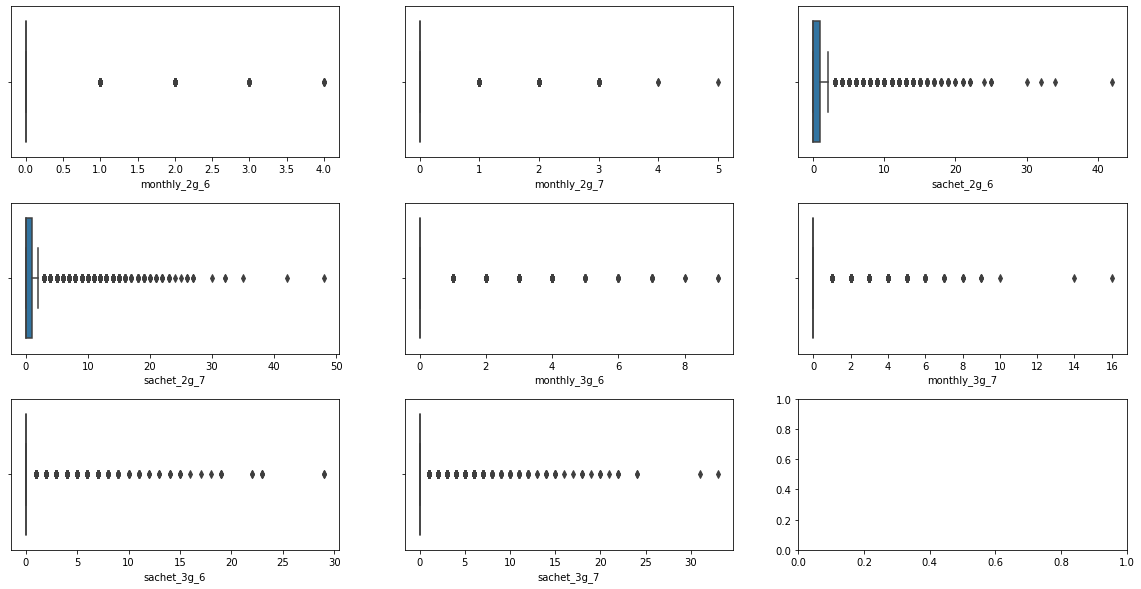

In [406]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

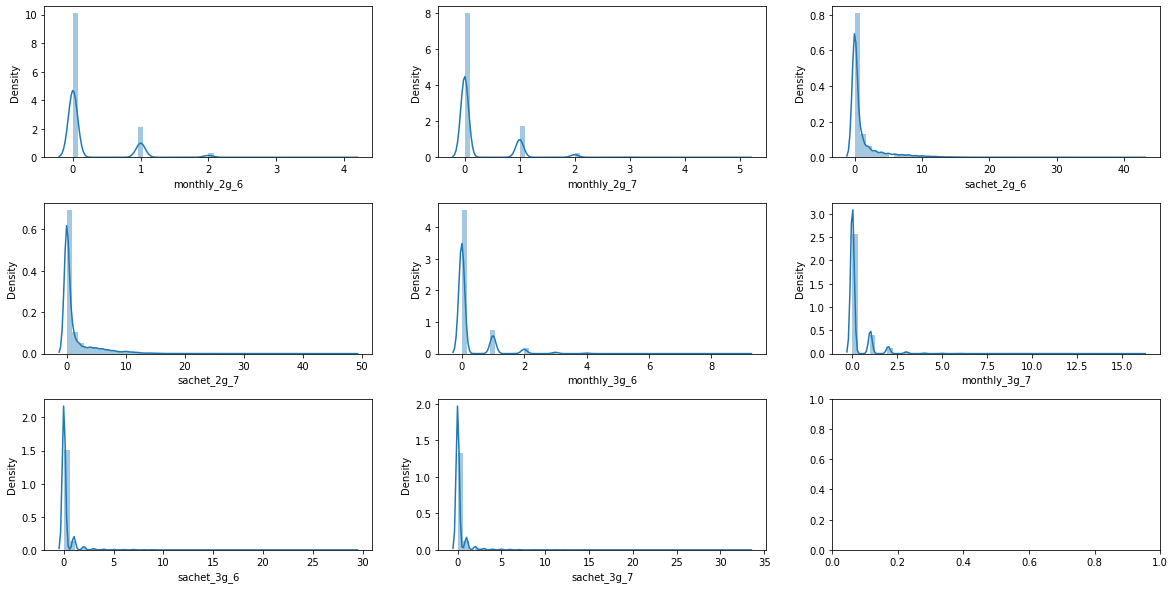

In [407]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [408]:
df_new[col_boxplot].skew().sort_values(ascending=False)

sachet_3g_6     10.552378
sachet_3g_7     10.073860
monthly_3g_7     4.924188
monthly_3g_6     3.942037
sachet_2g_6      3.404600
sachet_2g_7      3.338296
monthly_2g_6     2.223283
monthly_2g_7     2.164951
dtype: float64

In [409]:
#The data shows high skew and has lots of outliers. Transforming to log scale also did not help too. We will be doing outlier
#capping later and also scaling the data. No Action taken a we will be making changes later


count    16125.000000
mean      1202.305922
std        964.036282
min        149.000000
25%        435.000000
50%        851.000000
75%       1791.000000
max       4290.000000
Name: aon, dtype: float64

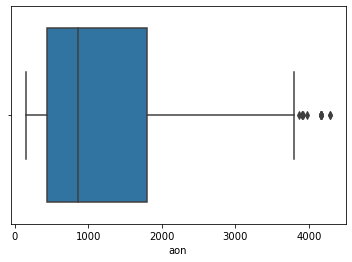

In [410]:
sns.boxplot(df_new['aon'])   
df_new['aon'].describe()

<AxesSubplot:xlabel='aon', ylabel='Density'>

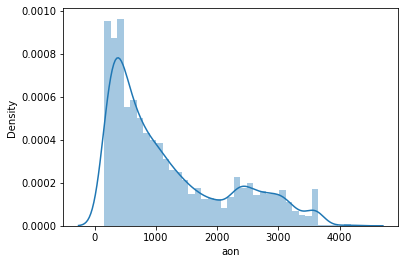

In [411]:
sns.distplot(df_new['aon'])   


In [412]:
testlist_log=df_new['aon']
testlist_sqrt = df_new['aon']

<AxesSubplot:xlabel='aon', ylabel='Density'>

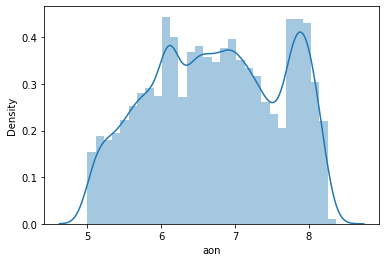

In [413]:
testlist_log=np.log(testlist_log)
sns.distplot(testlist_log)   


<AxesSubplot:xlabel='aon', ylabel='Density'>

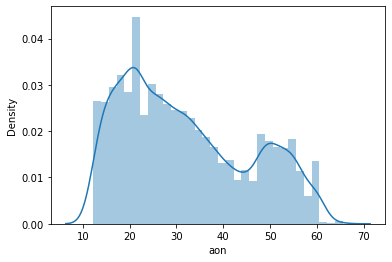

In [414]:
testlist_sqrt=np.sqrt(testlist_sqrt)
sns.distplot(testlist_sqrt)   

In [415]:
#The data shows high skew and has lots of outliers. Transforming to log and Sqrt also did not help and ended up causing multiple peaks.
#We will be doing outlier capping later and also scaling the data. No Action taken a we will be making changes later

In [416]:
 col_boxplot=['arpu_average','onnet_mou_average','offnet_mou_average', 'vol_2g_mb_average','vol_3g_mb_average','vbc_3g_average']

In [417]:
df_new[col_boxplot].describe()

arpu_average  onnet_mou_average  offnet_mou_average  vol_2g_mb_average  \
count  16125.000000       16125.000000        16125.000000       16125.000000   
mean     590.672621         268.742573          387.105827         142.875831   
std      491.904483         473.533864          484.802425         317.774465   
min     -451.713500           0.000000            0.000000           0.000000   
25%      321.627000          17.575000           73.960000           0.000000   
50%      532.700500          83.320000          221.785000          18.210000   
75%      735.543000         289.105000          514.925000         136.525000   
max    31438.461000        7331.060000         6878.395000        7939.075000   

       vol_3g_mb_average  vbc_3g_average  
count       16125.000000    16125.000000  
mean          453.565388      229.975635  
std           934.633305      436.980975  
min             0.000000        0.000000  
25%             0.000000        0.000000  
50%            27.460000        0.200000  
75%           626.025000      313.955000  
max         36667.845000     8190.585000

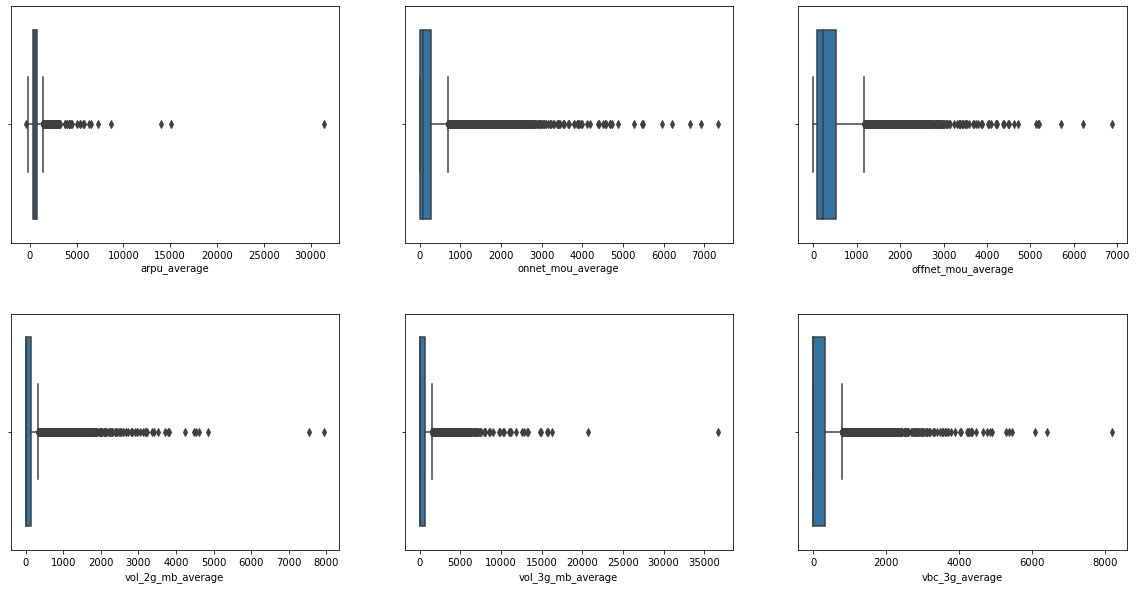

In [418]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

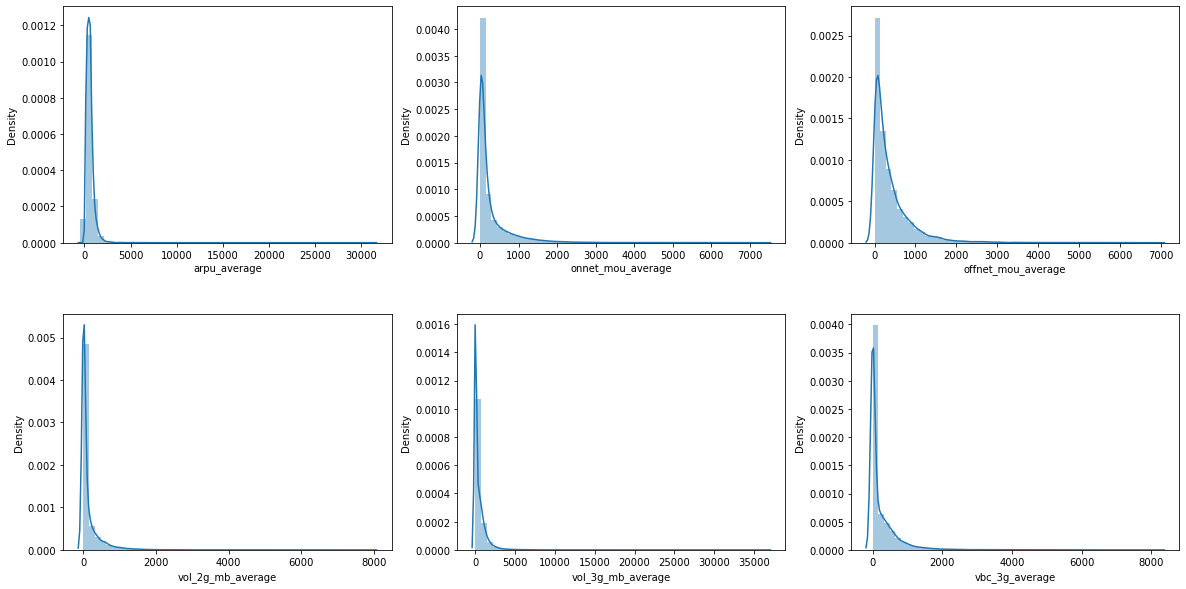

In [419]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [420]:
df_new[col_boxplot].skew().sort_values(ascending=False)

arpu_average          19.993387
vol_3g_mb_average      8.854752
vol_2g_mb_average      5.837949
vbc_3g_average         4.096011
onnet_mou_average      3.938498
offnet_mou_average     2.989431
dtype: float64

In [421]:
# Extereme skew in Arpu. Other data is also skewed and outliers oresent

In [422]:
col_boxplot= ['roam_og_mou_average','loc_og_t2t_mou_average','loc_og_t2m_mou_average','loc_og_t2f_mou_average','loc_og_t2c_mou_average','loc_og_mou_average','std_og_t2t_mou_average','std_og_t2m_mou_average','std_og_t2f_mou_average','std_og_mou_average','isd_og_mou_average','spl_og_mou_average','og_others_average','total_og_mou_average']

In [423]:
df_new[col_boxplot].describe()

roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         16125.000000            16125.000000            16125.000000   
mean             24.771553               91.256314              172.196363   
std             101.677966              242.701260              244.438642   
min               0.000000                0.000000                0.000000   
25%               0.000000                7.050000               26.625000   
50%               0.000000               28.010000               86.770000   
75%               1.930000               83.720000              218.810000   
max            2410.835000             5941.565000             4150.165000   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            16125.000000            16125.000000        16125.000000   
mean                 6.634512                1.777764          270.095740   
std                 19.756354                6.891523          384.776719   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           42.730000   
50%                  0.850000                0.000000          138.020000   
75%                  5.155000                1.205000          348.985000   
max                708.070000              420.575000         6582.420000   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            16125.000000            16125.000000            16125.000000   
mean               167.589443              184.247324                1.745804   
std                410.218580              411.148800               11.322785   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.455000               16.335000                0.000000   
75%                100.415000              153.655000                0.000000   
max               7308.050000             6122.560000              382.920000   

       std_og_mou_average  isd_og_mou_average  spl_og_mou_average  \
count        16125.000000        16125.000000        16125.000000   
mean           353.586168            2.510032            6.712534   
std            620.277512           58.382043           19.720345   
min              0.000000            0.000000            0.000000   
25%              1.250000            0.000000            0.000000   
50%             36.775000            0.000000            1.900000   
75%            462.300000            0.000000            7.045000   
max           7323.595000         5695.470000         1144.500000   

       og_others_average  total_og_mou_average  
count       16125.000000          16125.000000  
mean            0.353871            632.384721  
std             2.800363            704.759109  
min             0.000000              0.000000  
25%             0.000000            115.610000  
50%             0.000000            408.745000  
75%             0.000000            933.265000  
max           304.905000           7441.790000

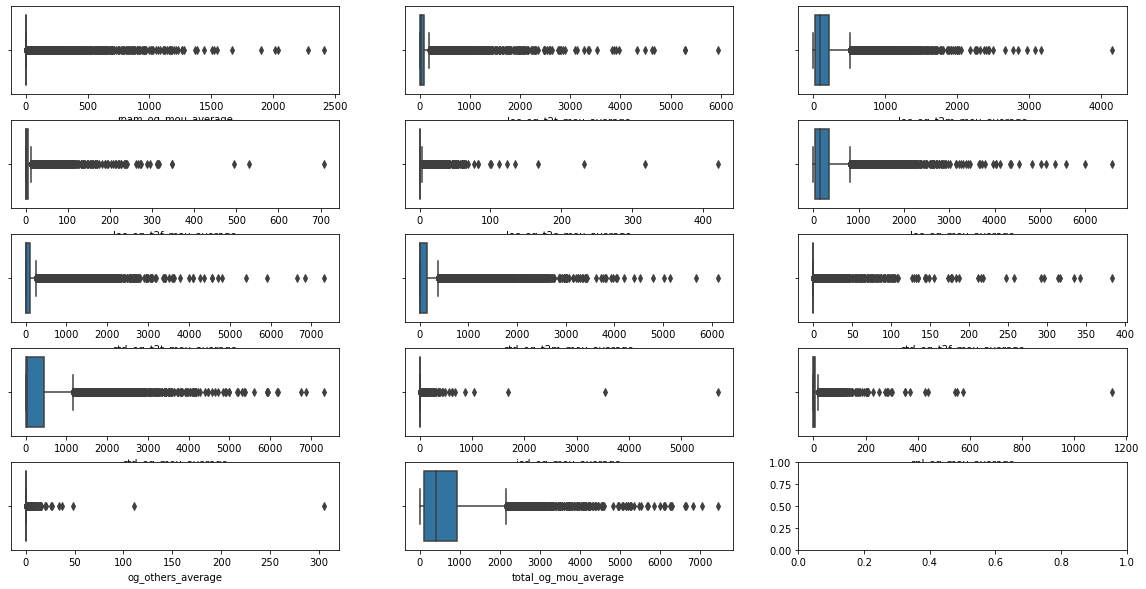

In [424]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

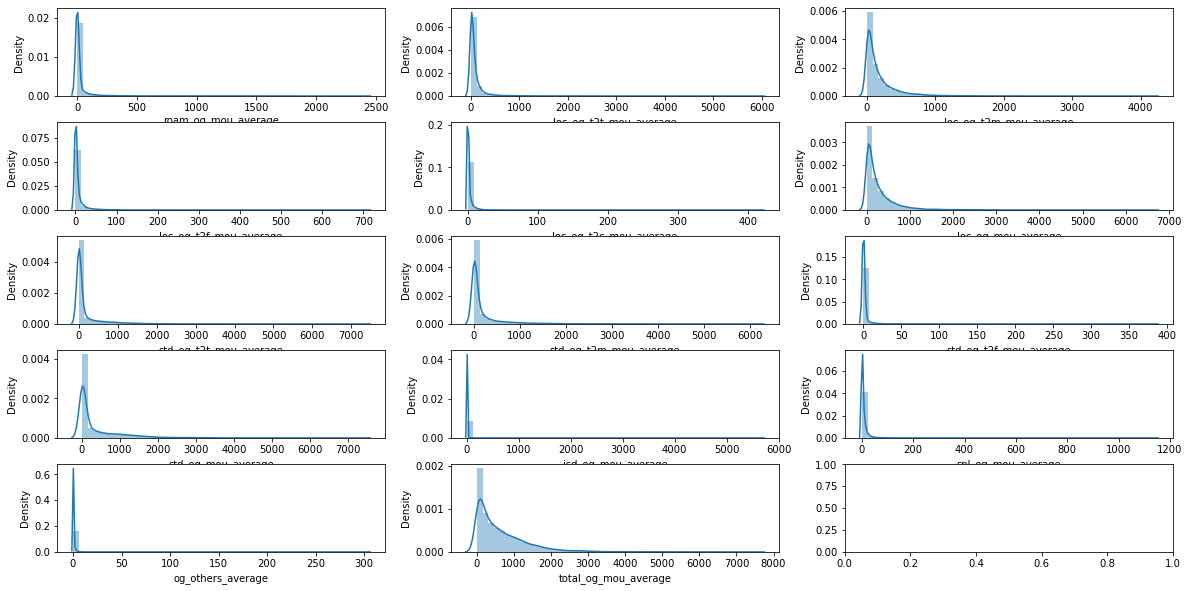

In [425]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [426]:
df_new[col_boxplot].skew().sort_values(ascending=False)

og_others_average         84.553985
isd_og_mou_average        74.050595
loc_og_t2c_mou_average    26.396458
spl_og_mou_average        21.223195
std_og_t2f_mou_average    17.226738
loc_og_t2f_mou_average    10.712030
loc_og_t2t_mou_average     9.239437
roam_og_mou_average        8.925597
std_og_t2t_mou_average     4.608355
std_og_t2m_mou_average     4.142175
loc_og_mou_average         4.058934
loc_og_t2m_mou_average     3.605610
std_og_mou_average         2.871538
total_og_mou_average       2.248511
dtype: float64

In [427]:
# This variables also have the same positive skew and have outliers present

In [428]:
col_boxplot=['roam_ic_mou_average', 'loc_ic_t2t_mou_average','loc_ic_t2m_mou_average','loc_ic_t2f_mou_average','loc_ic_mou_average','std_ic_t2t_mou_average','std_ic_t2m_mou_average','std_ic_t2f_mou_average','std_ic_mou_average','total_ic_mou_average','spl_ic_mou_average','isd_ic_mou_average','ic_others_average']
df_new[col_boxplot].describe()

roam_ic_mou_average  loc_ic_t2t_mou_average  loc_ic_t2m_mou_average  \
count         16125.000000            16125.000000            16125.000000   
mean             14.777419               68.890877              158.670472   
std              66.051495              152.058479              206.768367   
min               0.000000                0.000000                0.000000   
25%               0.000000                9.940000               38.535000   
50%               0.000000               29.135000               94.185000   
75%               1.350000               72.785000              200.660000   
max            2773.195000             3609.320000             4238.885000   

       loc_ic_t2f_mou_average  loc_ic_mou_average  std_ic_t2t_mou_average  \
count            16125.000000        16125.000000            16125.000000   
mean                17.166901          244.738343               15.154657   
std                 45.370239          298.992242               73.228668   
min                  0.000000            0.000000                0.000000   
25%                  0.365000           63.345000                0.000000   
50%                  3.380000          151.170000                1.250000   
75%                 14.520000          317.710000                9.635000   
max               1236.920000         6556.670000             3776.720000   

       std_ic_t2m_mou_average  std_ic_t2f_mou_average  std_ic_mou_average  \
count            16125.000000            16125.000000        16125.000000   
mean                30.489926                3.018071           48.666281   
std                 94.904474               19.185182          134.481411   
min                  0.000000                0.000000            0.000000   
25%                  0.690000                0.000000            2.405000   
50%                  6.740000                0.000000           14.045000   
75%                 26.480000                0.860000           44.845000   
max               2625.405000             1185.045000         5337.500000   

       total_ic_mou_average  spl_ic_mou_average  isd_ic_mou_average  \
count          16125.000000        16125.000000        16125.000000   
mean             305.261546            0.039929           11.269507   
std              352.076652            0.161784           74.095010   
min                0.000000            0.000000            0.000000   
25%               90.755000            0.000000            0.000000   
50%              201.225000            0.000000            0.000000   
75%              396.410000            0.015000            0.680000   
max             7579.500000           16.610000         5651.025000   

       ic_others_average  
count       16125.000000  
mean            1.403271  
std            13.061426  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.240000  
max           899.035000

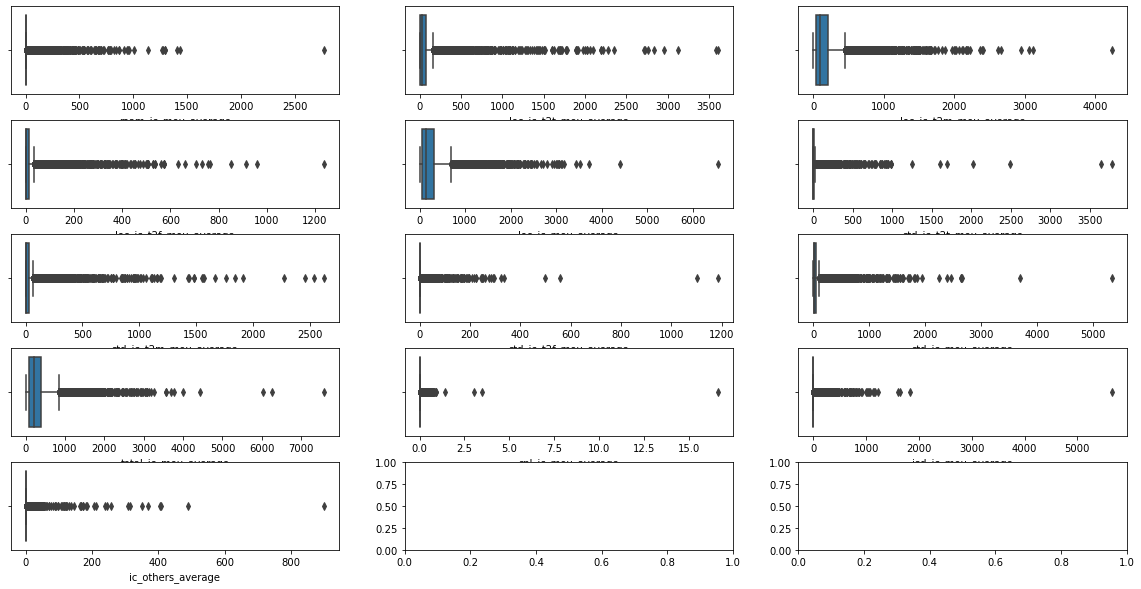

In [429]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

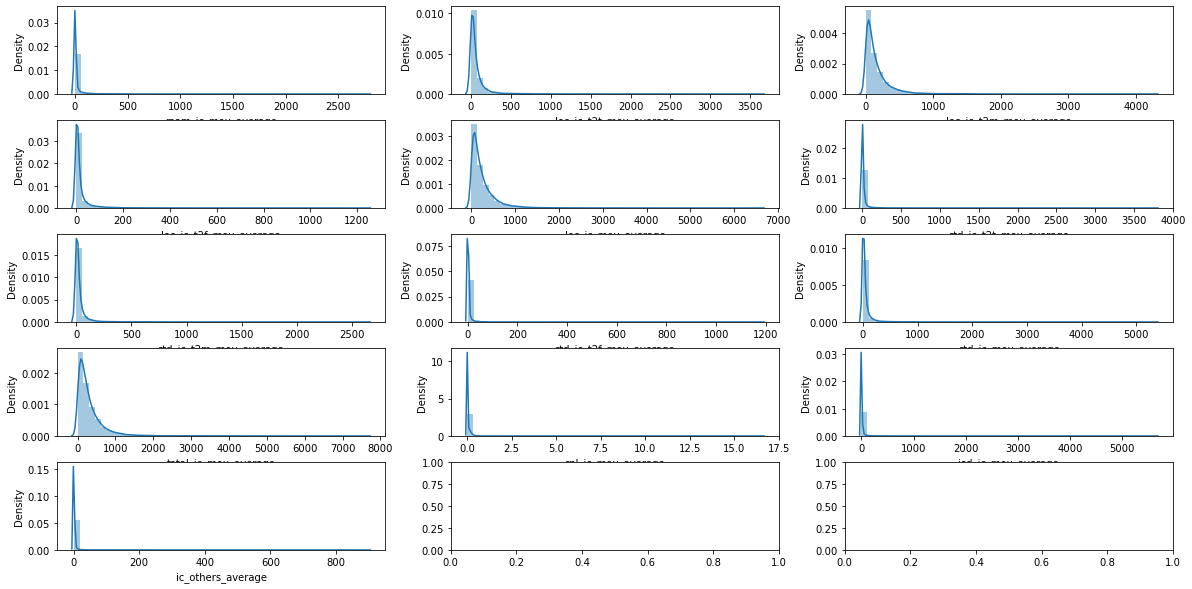

In [430]:
fig, axes = plt.subplots(5, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()

In [431]:
df_new[col_boxplot].skew().sort_values(ascending=False)

spl_ic_mou_average        68.174126
ic_others_average         34.955095
isd_ic_mou_average        34.030455
std_ic_t2f_mou_average    32.667154
std_ic_t2t_mou_average    24.740244
roam_ic_mou_average       12.735826
std_ic_mou_average        11.736587
std_ic_t2m_mou_average    11.364817
loc_ic_t2t_mou_average     9.113327
loc_ic_t2f_mou_average     8.186791
loc_ic_t2m_mou_average     4.332095
total_ic_mou_average       3.889628
loc_ic_mou_average         3.862549
dtype: float64

In [432]:
# This variables also have the same positive skew and have outliers present

In [433]:
col_boxplot=['total_rech_num_average','total_rech_amt_average','max_rech_amt_average','total_rech_data_average','max_rech_data_average','last_day_rch_amt_average','count_rech_2g_average','count_rech_3g_average','av_rech_amt_data_average']
df_new[col_boxplot].describe()

total_rech_num_average  total_rech_amt_average  max_rech_amt_average  \
count            16125.000000            16125.000000          16125.000000   
mean                12.097550              695.969519            175.313891   
std                  8.927733              584.127109            150.465411   
min                  0.000000                0.000000              0.000000   
25%                  6.500000              374.000000            110.000000   
50%                  9.500000              633.000000            139.000000   
75%                 14.500000              868.000000            201.000000   
max                122.500000            37762.500000           3299.000000   

       total_rech_data_average  max_rech_data_average  \
count             16125.000000           16125.000000   
mean                  2.069364              93.017984   
std                   2.942686             106.374716   
min                   0.000000               0.000000   
25%                   0.000000               0.000000   
50%                   1.000000              72.500000   
75%                   2.500000             154.000000   
max                  54.500000            1555.000000   

       last_day_rch_amt_average  count_rech_2g_average  count_rech_3g_average  \
count              16125.000000           16125.000000           16125.000000   
mean                 102.804558               1.546326               0.523039   
std                  116.773332               2.619015               1.233014   
min                    0.000000               0.000000               0.000000   
25%                   30.000000               0.000000               0.000000   
50%                   80.000000               0.500000               0.000000   
75%                  126.000000               1.500000               0.500000   
max                 3100.000000              38.500000              26.500000   

       av_rech_amt_data_average  
count              16125.000000  
mean                 159.788052  
std                  190.236779  
min                    0.000000  
25%                    0.000000  
50%                  137.000000  
75%                  231.000000  
max                 5142.500000

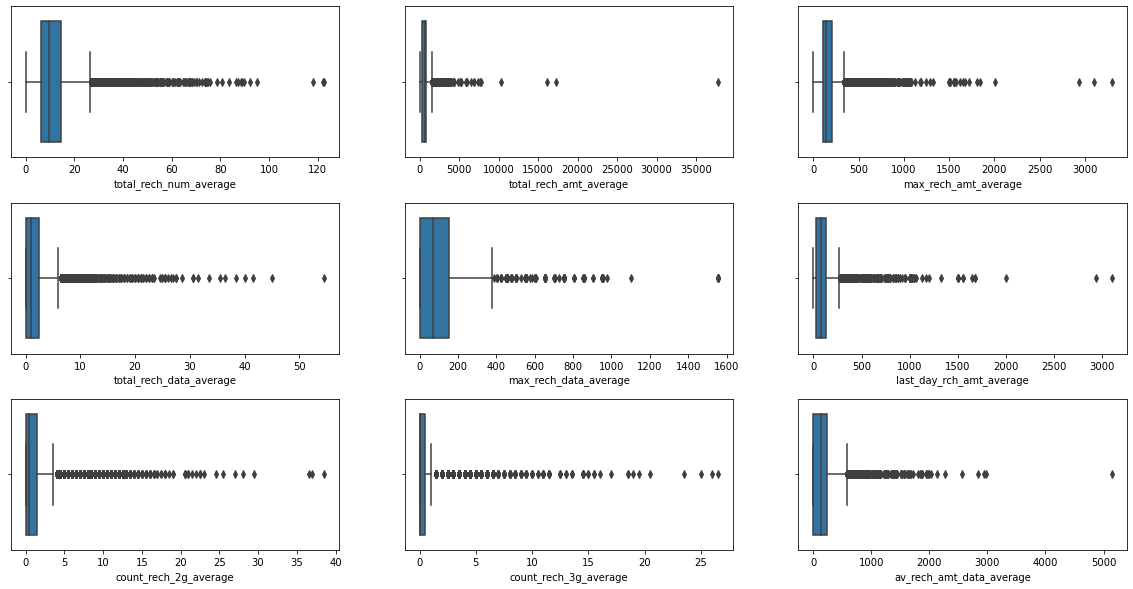

In [434]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.boxplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()


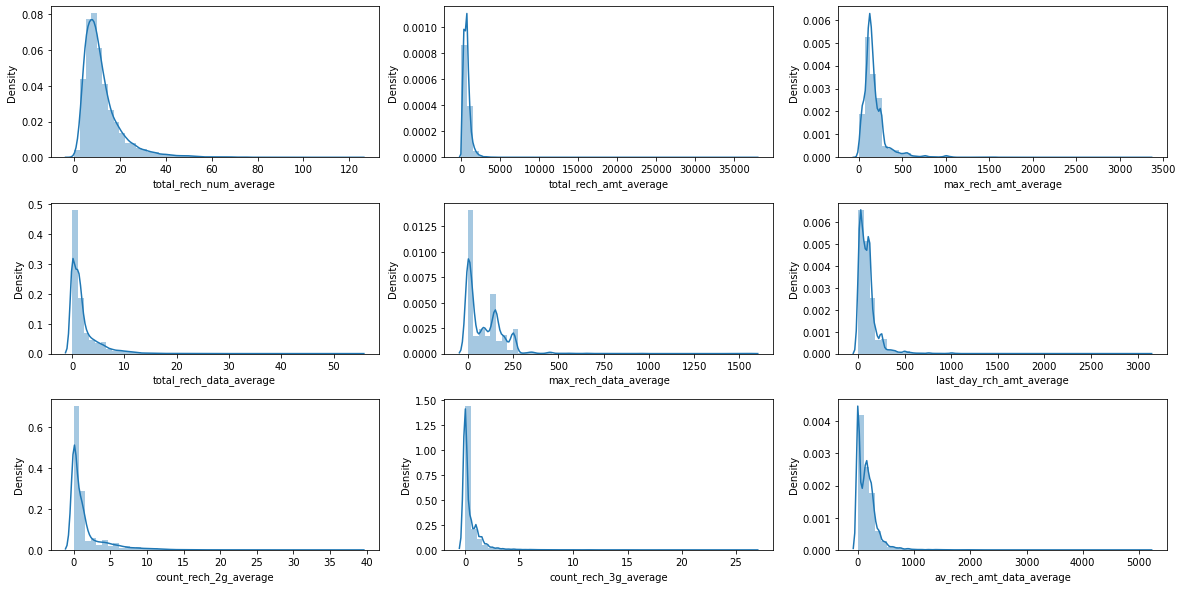

In [435]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 3)
    sns.distplot(df_new[col], ax=axes[i, j])   
plt.subplots_adjust(hspace=0.3) 
plt.show()


In [436]:
df_new[col_boxplot].skew().sort_values(ascending=False)

total_rech_amt_average      20.230254
count_rech_3g_average        7.117500
last_day_rch_amt_average     5.913718
max_rech_amt_average         4.612819
av_rech_amt_data_average     4.325305
total_rech_data_average      3.720190
count_rech_2g_average        3.193816
max_rech_data_average        2.837241
total_rech_num_average       2.763710
dtype: float64

In [437]:
# Positive skew and extreme outliers present

0.0    15234
1.0      891
Name: churn_probability, dtype: int64
0.0    94.47
1.0     5.53
Name: churn_probability, dtype: float64


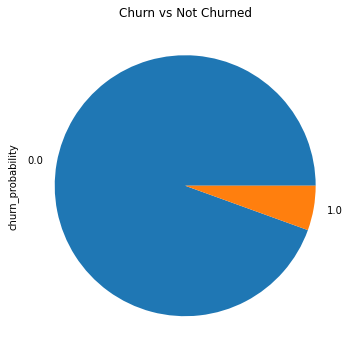

In [438]:
df_new['churn_probability'].value_counts().plot(kind='pie',figsize=[12,6],title='Churn vs Not Churned')
print(df_new['churn_probability'].value_counts())
print(round((df_new['churn_probability'].value_counts()*100 / df_new.shape[0]),2))

In [439]:
#91.77 of the customers given haven't churned

0.0    98.462016
1.0     1.537984
Name: night_pck_user_6, dtype: float64


<AxesSubplot:>

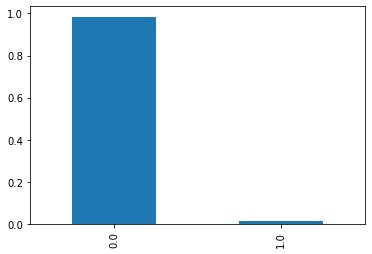

In [440]:
print(df_new['night_pck_user_6'].value_counts(normalize=True)*100)
df_new['night_pck_user_6'].value_counts(normalize=True).plot(kind='bar')

0.0    98.486822
1.0     1.513178
Name: night_pck_user_7, dtype: float64


<AxesSubplot:>

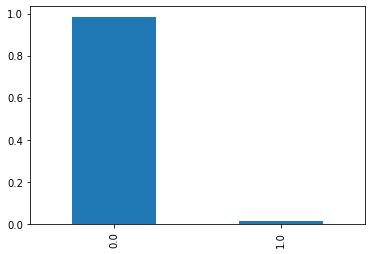

In [441]:
print(df_new['night_pck_user_7'].value_counts(normalize=True)*100)
df_new['night_pck_user_7'].value_counts(normalize=True).plot(kind='bar')

In [442]:
#Only 1.37% of the users use nightpack in month 6 and 1.30 in month 8


1.0    60.675969
0.0    39.324031
Name: fb_user_6, dtype: float64


<AxesSubplot:>

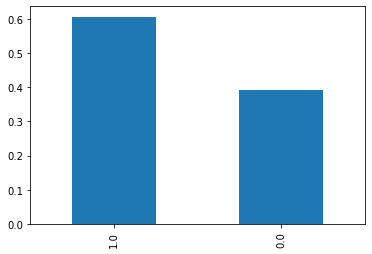

In [443]:
print(df_new['fb_user_6'].value_counts(normalize=True)*100)
df_new['fb_user_6'].value_counts(normalize=True).plot(kind='bar')

1.0    61.817054
0.0    38.182946
Name: fb_user_7, dtype: float64


<AxesSubplot:>

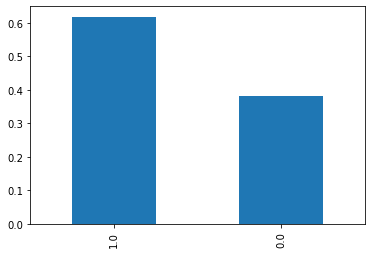

In [444]:
print(df_new['fb_user_7'].value_counts(normalize=True)*100)
df_new['fb_user_7'].value_counts(normalize=True).plot(kind='bar')

In [445]:
# The percentage of FB users are consistent among both 6 and 7 month

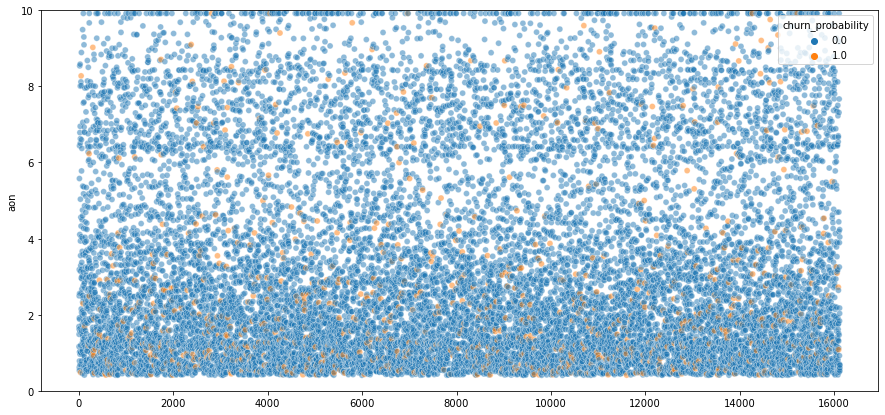

In [446]:
plt.figure(figsize=(15,7))
sns.scatterplot(y=df_new['aon']/365, x=df_new.index, hue=df_new.churn_probability, alpha=0.5)
plt.ylim(0,10)
plt.show()

In [447]:
#Churn is higher when aon is lower

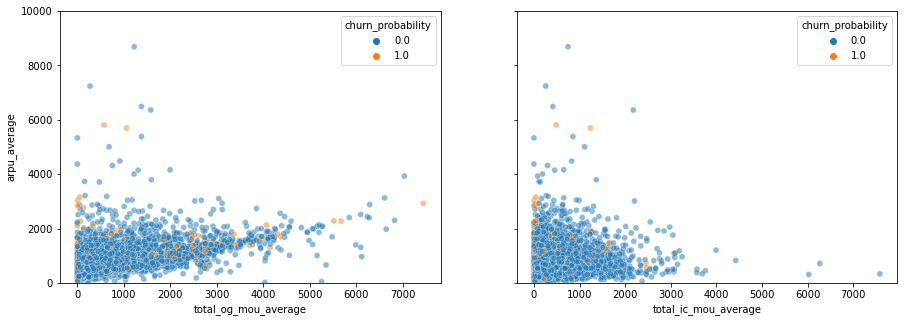

In [448]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(y='arpu_average', x='total_og_mou_average', data=df_new, ax=axes[0], hue='churn_probability', alpha=0.5)
sns.scatterplot(y='arpu_average', x='total_ic_mou_average', data=df_new, ax=axes[1], hue='churn_probability', alpha=0.5)
plt.ylim(0,10000)
plt.show()

In [449]:
#There is no linear relationship between Arpu and IC and OG, also so visual impact is seen on churn

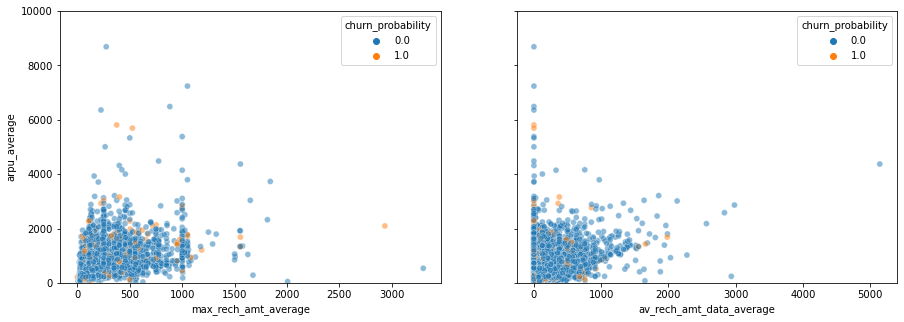

In [450]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.scatterplot(y='arpu_average', x='max_rech_amt_average', data=df_new, ax=axes[0], hue='churn_probability', alpha=0.5)
sns.scatterplot(y='arpu_average', x='av_rech_amt_data_average', data=df_new, ax=axes[1], hue='churn_probability', alpha=0.5)
plt.ylim(0,10000)
plt.show()

In [451]:
#There is no obvious linear relation that is seen. Also churn is not concentrated in a particular cluster

In [676]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [677]:
#Capping Outliers
df_new[num_cols] = df_new[num_cols].apply(cap_outliers, axis=0)

In [678]:
#df_new_backup_top=df_new.copy(deep=True)
df_PCA=df_new.copy(deep=True) ## For PCA later without multicollinearity removal

Text(0.5, 1.0, 'Heatmap showing corelations between variables')

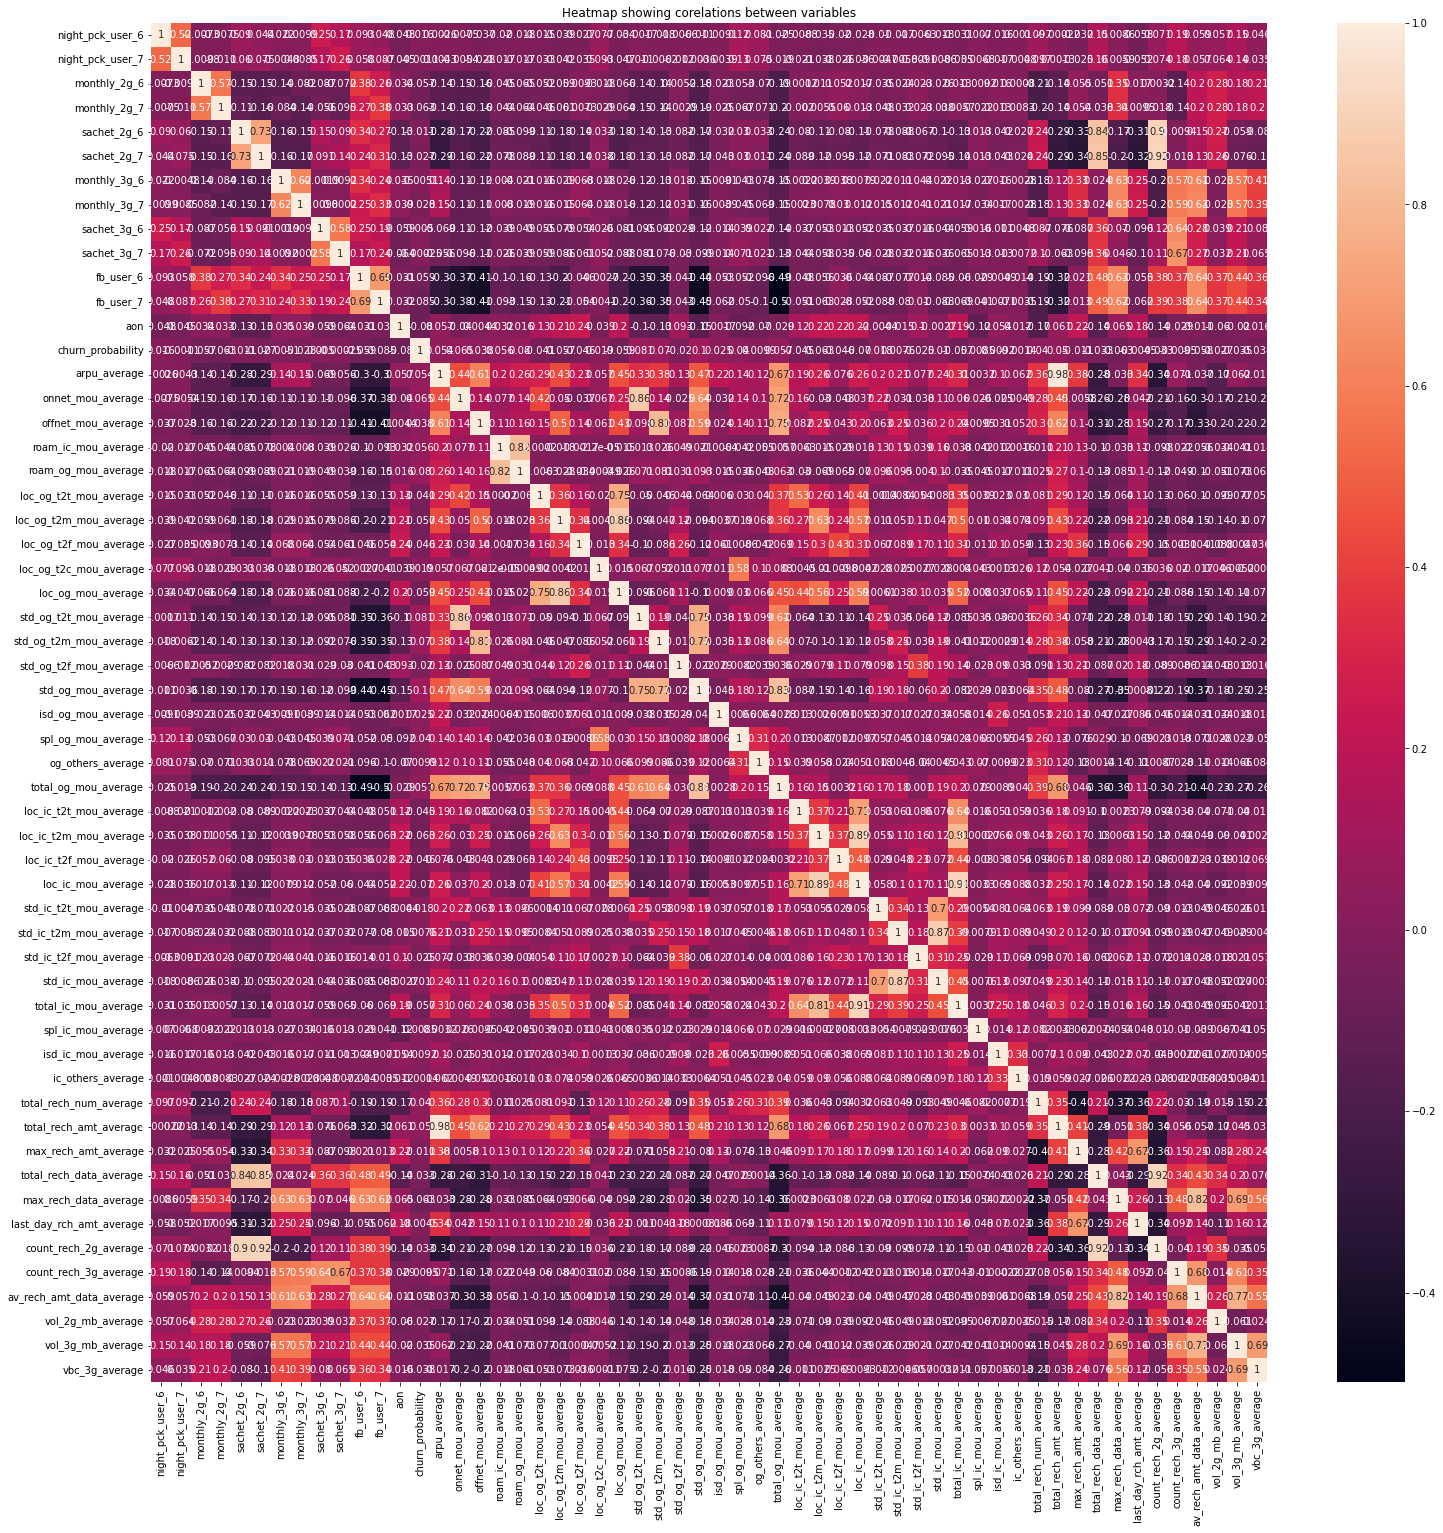

In [679]:
plt.figure(figsize=[25,25])
cor1=df_new.corr(method='pearson')
sns.heatmap(cor1,annot=True,)
plt.title('Heatmap showing corelations between variables')


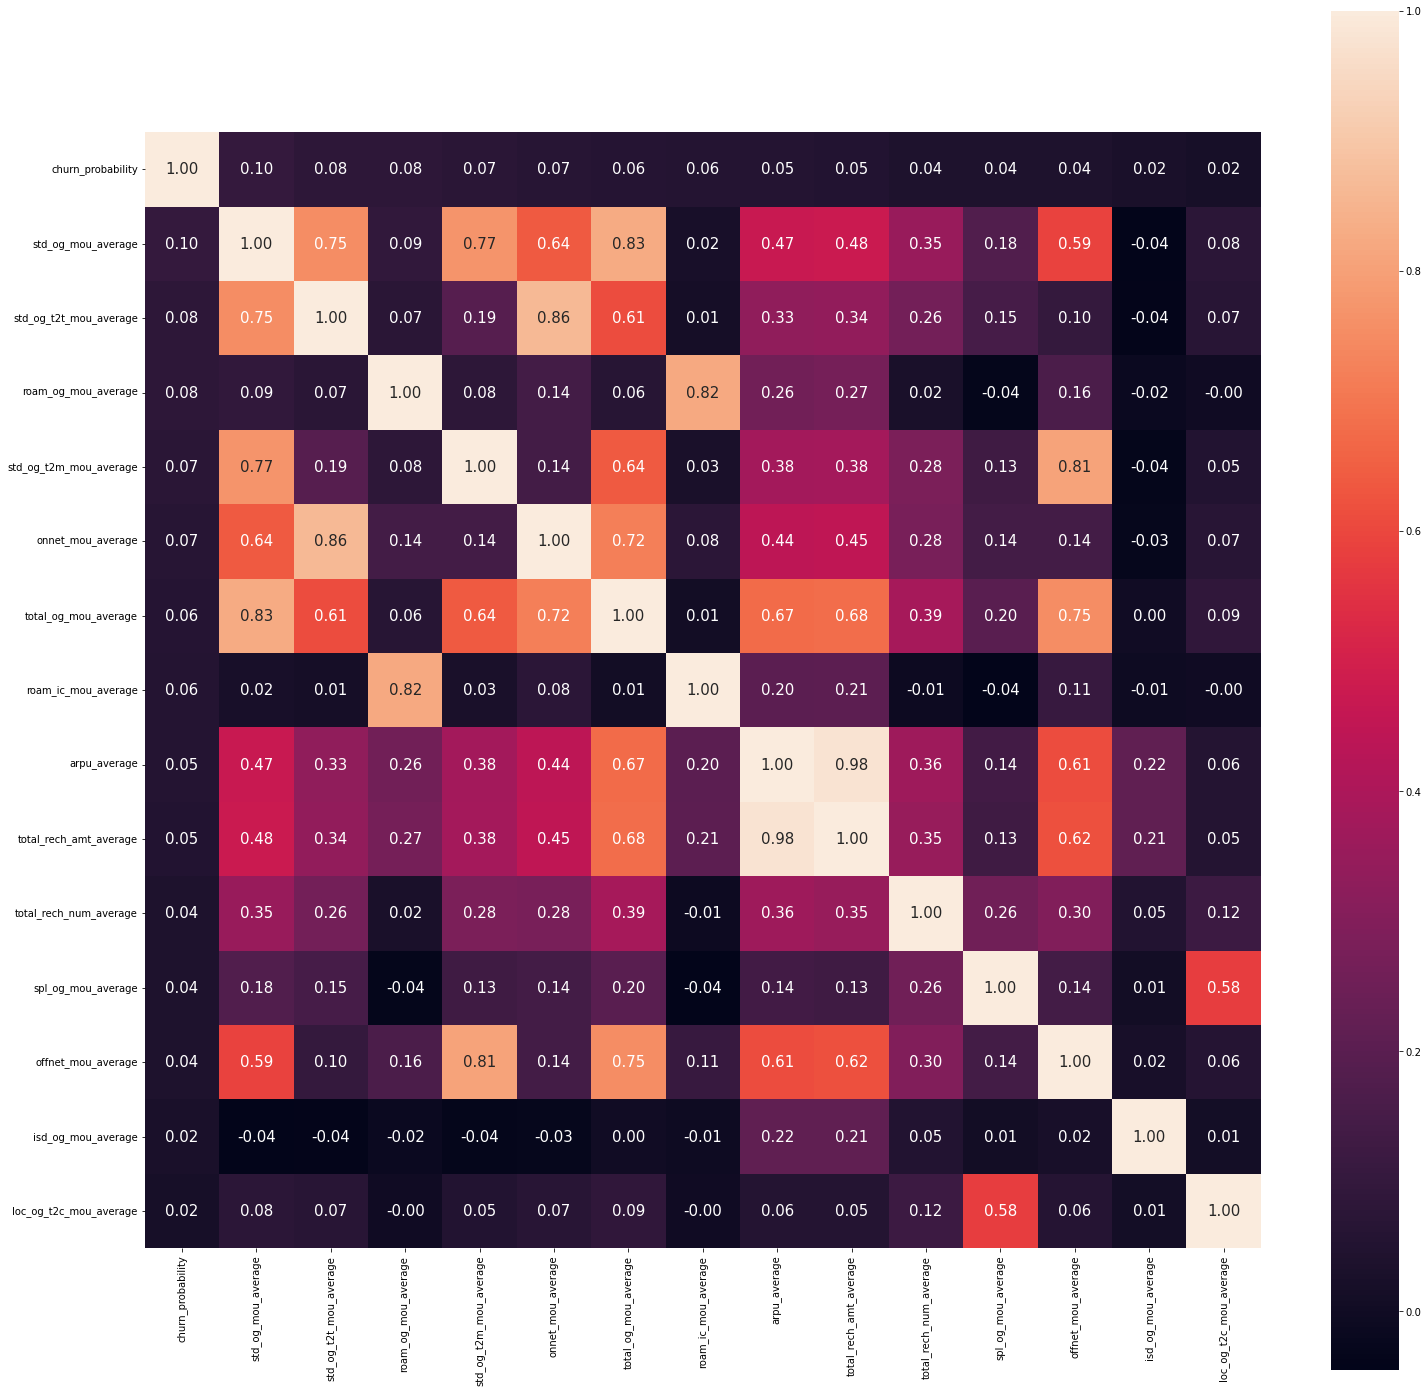

In [680]:
#The above heatmap is too big and not easily intrepeted so lets check the heat map with only top 15 co-related variables with CHurn
corrmat = df_new.corr()
cols = corrmat.nlargest(15, 'churn_probability')['churn_probability'].index
cm = np.corrcoef(df_new[cols].values.T)
plt.figure(figsize=[25,25])
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [681]:
#Lets Drop all variables from the upper triangle that are more than 75% corelated
corr_matrix = df_new.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.60)]
col_to_drop

['sachet_2g_7',
 'monthly_3g_7',
 'fb_user_7',
 'offnet_mou_average',
 'roam_og_mou_average',
 'loc_og_mou_average',
 'std_og_t2t_mou_average',
 'std_og_t2m_mou_average',
 'std_og_mou_average',
 'total_og_mou_average',
 'loc_ic_t2m_mou_average',
 'loc_ic_mou_average',
 'std_ic_mou_average',
 'total_ic_mou_average',
 'total_rech_amt_average',
 'total_rech_data_average',
 'max_rech_data_average',
 'last_day_rch_amt_average',
 'count_rech_2g_average',
 'count_rech_3g_average',
 'av_rech_amt_data_average',
 'vol_3g_mb_average',
 'vbc_3g_average']

In [687]:
df_new.shape

(16125, 33)

In [683]:
#Dropping Highly Corelated Variables
df_new.drop(col_to_drop,axis=1,inplace=True)

In [688]:
df_new.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16125 entries, 0 to 16124
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   night_pck_user_6        16125 non-null  float64
 1   night_pck_user_7        16125 non-null  float64
 2   monthly_2g_6            16125 non-null  float64
 3   monthly_2g_7            16125 non-null  float64
 4   sachet_2g_6             16125 non-null  float64
 5   monthly_3g_6            16125 non-null  float64
 6   sachet_3g_6             16125 non-null  float64
 7   sachet_3g_7             16125 non-null  float64
 8   fb_user_6               16125 non-null  float64
 9   aon                     16125 non-null  float64
 10  churn_probability       16125 non-null  float64
 11  arpu_average            16125 non-null  float64
 12  onnet_mou_average       16125 non-null  float64
 13  roam_ic_mou_average     16125 non-null  float64
 14  loc_og_t2t_mou_average  16125 non-null

In [460]:
#after Multicol
#backupdf=df_new.copy(deep=True)

In [461]:
## Building Model Pre-Processing 

In [689]:
# Putting feature variable to X
X = df_new.drop('churn_probability',axis=1)

# Putting response variable to y
y = df_new['churn_probability']

In [690]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y, random_state=42)
X_train.shape, X_test.shape

((11287, 32), (4838, 32))

In [691]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11287, 32)
(4838, 32)
(11287,)
(4838,)


In [692]:
y_train.value_counts()

0.0    10663
1.0      624
Name: churn_probability, dtype: int64

In [693]:
## Data imbalance is seen.
#There are 10663 data points that belong to class 0 and only 624 belong to class 1

### Correcting imbalance using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [694]:
y_train.value_counts()

1.0    10663
0.0    10663
Name: churn_probability, dtype: int64

In [695]:
#Class imbalance has been corrected

In [702]:
# Scaling
all_columns=df_new.columns
cat_col2=['night_pck_user_6','night_pck_user_7','fb_user_6','churn_probability']
num_cols = [i for i in all_columns if i not in cat_col2]

In [703]:
num_cols

['monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'arpu_average',
 'onnet_mou_average',
 'roam_ic_mou_average',
 'loc_og_t2t_mou_average',
 'loc_og_t2m_mou_average',
 'loc_og_t2f_mou_average',
 'loc_og_t2c_mou_average',
 'std_og_t2f_mou_average',
 'isd_og_mou_average',
 'spl_og_mou_average',
 'og_others_average',
 'loc_ic_t2t_mou_average',
 'loc_ic_t2f_mou_average',
 'std_ic_t2t_mou_average',
 'std_ic_t2m_mou_average',
 'std_ic_t2f_mou_average',
 'spl_ic_mou_average',
 'isd_ic_mou_average',
 'ic_others_average',
 'total_rech_num_average',
 'max_rech_amt_average',
 'vol_2g_mb_average']

In [704]:
# Using Standard scalar
scaler = StandardScaler()
# Transforming and Fitting data on Train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#S Transforming without fitting on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [705]:
### Modelling ###

In [706]:
#Logistic Regression - Without PCA

In [707]:
import statsmodels.api as sm

In [708]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                21326
Model:                            GLM   Df Residuals:                    21293
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13148.
Date:                Wed, 21 Dec 2022   Deviance:                       26296.
Time:                        19:42:42   Pearson chi2:                 2.19e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1927      0.032      5.988      0.000       0.130       0.256
night_pck_user_6           0.4972      0.159      3.129      0.002       0.186       0.809
night_pck_user_7          -0.8842      0.165     -5.348      0.000      -1.208      -0.560
monthly_2g_6              -0.0385      0.021     -1.868      0.062      -0.079       0.002
monthly_2g_7              -0.2088      0.019    -11.241      0.000      -0.245      -0.172
sachet_2g_6               -0.0536      0.020     -2.692      0.007      -0.093      -0.015
monthly_3g_6               0.0138      0.020      0.696      0.486      -0.025       0.053
sachet_3g_6                0.0858      0.019      4.590      0.000       0.049       0.122
sachet_3g_7               -0.0457      0.018     -2.535      0.011      -0.081      -0.010
fb_user_6                 -0.3783      0.053     -7.081      0.000      -0.483      -0.274
aon                       -0.3098      0.017    -18.397      0.000      -0.343      -0.277
arpu_average               0.3570      0.029     12.397      0.000       0.301       0.413
onnet_mou_average          0.0159      0.021      0.756      0.450      -0.025       0.057
roam_ic_mou_average        0.1923      0.017     11.038      0.000       0.158       0.226
loc_og_t2t_mou_average    -0.1336      0.021     -6.385      0.000      -0.175      -0.093
loc_og_t2m_mou_average    -0.2639      0.020    -13.177      0.000      -0.303      -0.225
loc_og_t2f_mou_average    -0.0652      0.020     -3.224      0.001      -0.105      -0.026
loc_og_t2c_mou_average    -0.0411      0.018     -2.251      0.024      -0.077      -0.005
std_og_t2f_mou_average    -0.0253      0.017     -1.479      0.139      -0.059       0.008
isd_og_mou_average         0.0919      0.020      4.621      0.000       0.053       0.131
spl_og_mou_average         0.2250      0.020     11.282      0.000       0.186       0.264
og_others_average         -0.0678      0.016     -4.190      0.000      -0.100      -0.036
loc_ic_t2t_mou_average    -0.1458      0.020     -7.244      0.000      -0.185      -0.106
loc_ic_t2f_mou_average    -0.0704      0.019     -3.683      0.000      -0.108      -0.033
std_ic_t2t_mou_average    -0.0034      0.017     -0.200      0.841      -0.036       0.030
std_ic_t2m_mou_average    -0.0436      0.017     -2.638      0.008      -0.076      -0.011
std_ic_t2f_mou_average    -0.0926      0.018     -5.026      0.000      -0.129      -0.056
spl_ic_mou_average        -0.0241      0.015     -1.594      0.111      -0.054       0.006
isd_ic_mou_average        -0.0177      0.017     -1.025      0.306      -0.052       0.016
ic_others_average          0.0044      0.016      0.270      0.788      -0.028       0.036
total_rech_num_average    -0.1164      0.022     -5.175      0.000      -0.161  

In [709]:
# As seen above the P values for a lot of variables are too high, so we will use RFE and use p-value/VIF to further refine the model

In [710]:
###  Feature Selection Using RFE

In [711]:
logreg = LogisticRegression()


In [712]:
rfe = RFE(logreg, n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [713]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('night_pck_user_6', True, 1),
 ('night_pck_user_7', True, 1),
 ('monthly_2g_6', False, 10),
 ('monthly_2g_7', True, 1),
 ('sachet_2g_6', False, 8),
 ('monthly_3g_6', False, 16),
 ('sachet_3g_6', False, 6),
 ('sachet_3g_7', False, 9),
 ('fb_user_6', True, 1),
 ('aon', True, 1),
 ('arpu_average', True, 1),
 ('onnet_mou_average', False, 15),
 ('roam_ic_mou_average', True, 1),
 ('loc_og_t2t_mou_average', True, 1),
 ('loc_og_t2m_mou_average', True, 1),
 ('loc_og_t2f_mou_average', False, 2),
 ('loc_og_t2c_mou_average', False, 11),
 ('std_og_t2f_mou_average', False, 12),
 ('isd_og_mou_average', False, 3),
 ('spl_og_mou_average', True, 1),
 ('og_others_average', False, 5),
 ('loc_ic_t2t_mou_average', True, 1),
 ('loc_ic_t2f_mou_average', False, 4),
 ('std_ic_t2t_mou_average', False, 18),
 ('std_ic_t2m_mou_average', False, 7),
 ('std_ic_t2f_mou_average', True, 1),
 ('spl_ic_mou_average', False, 13),
 ('isd_ic_mou_average', False, 14),
 ('ic_others_average', False, 17),
 ('total_rech_num_avera

In [714]:
col = X_train.columns[rfe.support_]

In [715]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                21326
Model:                            GLM   Df Residuals:                    21310
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13213.
Date:                Wed, 21 Dec 2022   Deviance:                       26427.
Time:                        19:43:04   Pearson chi2:                 2.17e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2033      0.025      8.188      0.000       0.155       0.252
night_pck_user_6           0.5873      0.157      3.751      0.000       0.280       0.894
night_pck_user_7          -0.9209      0.162     -5.691      0.000      -1.238      -0.604
monthly_2g_7              -0.2200      0.017    -13.161      0.000      -0.253      -0.187
fb_user_6                 -0.3990      0.037    -10.738      0.000      -0.472      -0.326
aon                       -0.3187      0.016    -19.497      0.000      -0.351      -0.287
arpu_average               0.3929      0.025     15.948      0.000       0.345       0.441
roam_ic_mou_average        0.1867      0.017     11.009      0.000       0.153       0.220
loc_og_t2t_mou_average    -0.1295      0.020     -6.605      0.000      -0.168      -0.091
loc_og_t2m_mou_average    -0.3103      0.018    -16.889      0.000      -0.346      -0.274
spl_og_mou_average         0.1768      0.016     10.948      0.000       0.145       0.208
loc_ic_t2t_mou_average    -0.1654      0.020     -8.330      0.000      -0.204      -0.126
std_ic_t2f_mou_average    -0.1253      0.017     -7.242      0.000      -0.159      -0.091
total_rech_num_average    -0.1312      0.021     -6.162      0.000      -0.173      -0.089
max_rech_amt_average      -0.1604      0.022     -7.267      0.000      -0.204      -0.117
vol_2g_mb_average         -0.1192      0.017     -6.977      0.000      -0.153      -0.086
==========================================================================================
"""

In [716]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5             arpu_average  2.41
13    max_rech_amt_average  2.10
12  total_rech_num_average  2.06
7   loc_og_t2t_mou_average  1.58
10  loc_ic_t2t_mou_average  1.50
0         night_pck_user_6  1.47
1         night_pck_user_7  1.44
8   loc_og_t2m_mou_average  1.38
3                fb_user_6  1.19
14       vol_2g_mb_average  1.19
2             monthly_2g_7  1.15
4                      aon  1.14
6      roam_ic_mou_average  1.14
9       spl_og_mou_average  1.11
11  std_ic_t2f_mou_average  1.05

In [846]:
## P is 0 and Vif is less than 5 at its highest value, we ca conclude that this is a good model

In [ ]:
### Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [718]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7644632 , 0.38550224, 0.55687121, 0.42786261, 0.19972403,
       0.4823235 , 0.34469568, 0.24208326, 0.67575177, 0.45167521])

In [719]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0    1.0    0.764463
1    0.0    0.385502
2    0.0    0.556871
3    0.0    0.427863
4    0.0    0.199724

In [720]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [721]:
# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0    1.0    0.764463          1
1    0.0    0.385502          0
2    0.0    0.556871          1
3    0.0    0.427863          0
4    0.0    0.199724          0

In [722]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.predicted))

[[6794 3869]
 [3148 7515]]
              precision    recall  f1-score   support

         0.0       0.68      0.64      0.66     10663
         1.0       0.66      0.70      0.68     10663

    accuracy                           0.67     21326
   macro avg       0.67      0.67      0.67     21326
weighted avg       0.67      0.67      0.67     21326



In [723]:
#Repurposed Code for drawing roc
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [724]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )


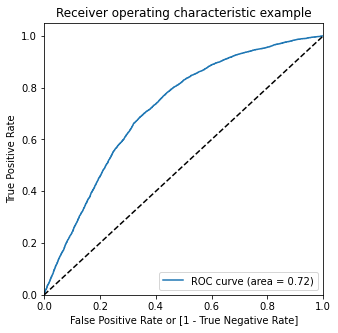

In [725]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [847]:
#AUC value of .72 is not considered great, but it acceptable and we can work with it

In [726]:
# Let's create columns with different probability cutoffs 
numbers = [float(j)/10 for j in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    1.0    0.764463          1    1    1    1    1    1    1    1    1    0   
1    0.0    0.385502          0    1    1    1    1    0    0    0    0    0   
2    0.0    0.556871          1    1    1    1    1    1    1    0    0    0   
3    0.0    0.427863          0    1    1    1    1    1    0    0    0    0   
4    0.0    0.199724          0    1    1    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [727]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.509894  0.997093  0.022695
0.2   0.2  0.549376  0.979368  0.119385
0.3   0.3  0.603911  0.939417  0.268405
0.4   0.4  0.654037  0.859702  0.448373
0.5   0.5  0.670965  0.704774  0.637157
0.6   0.6  0.625856  0.445559  0.806152
0.7   0.7  0.561380  0.204445  0.918316
0.8   0.8  0.518991  0.060302  0.977680
0.9   0.9  0.503001  0.007784  0.998218


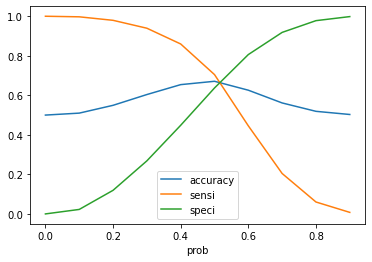

In [728]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [729]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0    1.0    0.764463          1    1    1    1    1    1    1    1    1    0   
1    0.0    0.385502          0    1    1    1    1    0    0    0    0    0   
2    0.0    0.556871          1    1    1    1    1    1    1    0    0    0   
3    0.0    0.427863          0    1    1    1    1    1    0    0    0    0   
4    0.0    0.199724          0    1    1    0    0    0    0    0    0    0   

   0.9  final_predicted  
0    0                1  
1    0                0  
2    0                1  
3    0                0  
4    0                0

In [730]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.6690424833536528

In [731]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[5768, 4895],
       [2163, 8500]], dtype=int64)

In [732]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_pred_final.Churn,y_train_pred_final.final_predicted)

0.7971490199756166

In [733]:
#Prediction on Test Set

In [734]:
X_test_1 = X_test[col]

In [735]:
X_test_sm = sm.add_constant(X_test_1)

In [736]:
y_test_pred = res.predict(X_test_sm)

In [737]:
y_test_pred = y_test_pred.values.reshape(-1)

In [738]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()


Churn  Churn_Prob
0    1.0    0.352623
1    0.0    0.341310
2    0.0    0.508792
3    0.0    0.153905
4    0.0    0.190856

In [739]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

In [740]:
y_test_pred_final.head()

Churn  Churn_Prob  final_predicted
0    1.0    0.352623                0
1    0.0    0.341310                0
2    0.0    0.508792                1
3    0.0    0.153905                0
4    0.0    0.190856                0

In [741]:
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.5477470028937578

In [742]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted )
confusion2

array([[2463, 2108],
       [  80,  187]], dtype=int64)

In [743]:
recall_score(y_test_pred_final.Churn,y_test_pred_final.final_predicted)

0.700374531835206

In [744]:
print('Classification Report on Train set')
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))
print('Classification Report on Test set')
print(classification_report(y_test_pred_final.Churn, y_test_pred_final.final_predicted))

Classification Report on Train set
              precision    recall  f1-score   support

         0.0       0.73      0.54      0.62     10663
         1.0       0.63      0.80      0.71     10663

    accuracy                           0.67     21326
   macro avg       0.68      0.67      0.66     21326
weighted avg       0.68      0.67      0.66     21326

Classification Report on Test set
              precision    recall  f1-score   support

         0.0       0.97      0.54      0.69      4571
         1.0       0.08      0.70      0.15       267

    accuracy                           0.55      4838
   macro avg       0.53      0.62      0.42      4838
weighted avg       0.92      0.55      0.66      4838



In [516]:
## Model 1 - Decision Tree

In [517]:
dt_base = DecisionTreeClassifier(random_state=42)

In [518]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [519]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [520]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[10663,     0],
       [    0, 10663]], dtype=int64)

In [521]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

1.0

In [522]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[4031,  540],
       [ 222,   45]], dtype=int64)

In [523]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.16853932584269662

In [524]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10663
         1.0       1.00      1.00      1.00     10663

    accuracy                           1.00     21326
   macro avg       1.00      1.00      1.00     21326
weighted avg       1.00      1.00      1.00     21326



In [525]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      4571
         1.0       0.08      0.17      0.11       267

    accuracy                           0.84      4838
   macro avg       0.51      0.53      0.51      4838
weighted avg       0.90      0.84      0.87      4838



In [526]:
#Hyper Parameter Tuning for decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [527]:
#Params to be tuned
params = {
    "max_depth": [2,3,5,10,20,30,40,50],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [528]:
# Performing 5 fold CV using RECALL as scoring parameter
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [529]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [530]:
grid_search.best_score_

0.896092274619598

In [531]:
# Assigning tuned hyper parameter model to dt_best
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [532]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [533]:
print('Decision Tree With Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89     10663
         1.0       0.87      0.93      0.90     10663

    accuracy                           0.90     21326
   macro avg       0.90      0.90      0.90     21326
weighted avg       0.90      0.90      0.90     21326



In [534]:
print('Decision Tree With Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88      4571
         1.0       0.09      0.29      0.14       267

    accuracy                           0.80      4838
   macro avg       0.52      0.56      0.51      4838
weighted avg       0.90      0.80      0.84      4838



In [535]:
#--- 2 Model created - dt_base and dt_best for Decision Tree

In [536]:
## Model 2 - Random Forest

In [537]:
rf_base = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [538]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [539]:
y_train_pred = rf_base.predict(X_train)
y_test_pred = rf_base.predict(X_test)

In [540]:
print('Random Forest with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))


Random Forest with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10663
         1.0       1.00      1.00      1.00     10663

    accuracy                           1.00     21326
   macro avg       1.00      1.00      1.00     21326
weighted avg       1.00      1.00      1.00     21326



In [541]:
print('Random Forest with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      4571
         1.0       0.10      0.05      0.06       267

    accuracy                           0.92      4838
   macro avg       0.52      0.51      0.51      4838
weighted avg       0.90      0.92      0.91      4838



In [542]:
#Hyper Parameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [543]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [544]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           verbose=1, scoring="accuracy")

In [545]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [546]:
grid_search.best_score_

0.9489854785707103

In [547]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [548]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [549]:
print('Random Forest with  Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Random Forest with  Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10663
         1.0       0.99      0.98      0.99     10663

    accuracy                           0.99     21326
   macro avg       0.99      0.99      0.99     21326
weighted avg       0.99      0.99      0.99     21326



In [550]:
print('Random Forest with  Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with  Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      4571
         1.0       0.11      0.09      0.10       267

    accuracy                           0.91      4838
   macro avg       0.53      0.53      0.53      4838
weighted avg       0.90      0.91      0.91      4838



In [551]:
#MODEL 3 - XG Boost

In [552]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [553]:
xgb_cfl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [554]:
y_train_pred = xgb_cfl.predict(X_train)
y_test_pred = xgb_cfl.predict(X_test)

In [555]:

print('XGBoost with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

XGBoost with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     10663
         1.0       1.00      0.99      0.99     10663

    accuracy                           0.99     21326
   macro avg       0.99      0.99      0.99     21326
weighted avg       0.99      0.99      0.99     21326



In [556]:
print('XGBoost with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

XGBoost with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      4571
         1.0       0.07      0.04      0.05       267

    accuracy                           0.92      4838
   macro avg       0.51      0.50      0.50      4838
weighted avg       0.90      0.92      0.91      4838



In [557]:
### XGBOost Hyper Parameter Tuning

#Hyper Parameter Tuning - Using Random Search## 

In [558]:
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=5, verbose=3, random_state=42)

In [849]:
#random_search.fit(X_train, y_train) - Ran for 5 hours before system shutdown. Please try fitting if you have heavy computational equipment

In [560]:
#### PCA####

In [561]:
df_PCA

night_pck_user_6  night_pck_user_7  monthly_2g_6  monthly_2g_7  \
0                   0.0               0.0      0.000000           0.0   
1                   0.0               0.0      0.000000           0.0   
2                   0.0               0.0      1.000000           0.0   
3                   0.0               0.0      1.644065           1.0   
4                   0.0               0.0      0.000000           0.0   
...                 ...               ...           ...           ...   
16120               0.0               0.0      0.000000           0.0   
16121               1.0               0.0      0.000000           0.0   
16122               0.0               0.0      1.000000           0.0   
16123               0.0               0.0      0.000000           0.0   
16124               0.0               0.0      0.000000           0.0   

       sachet_2g_6  sachet_2g_7  monthly_3g_6  monthly_3g_7  sachet_3g_6  \
0              7.0          6.0           0.0           0.0          0.0   
1              0.0          0.0           0.0           0.0          0.0   
2              3.0          1.0           0.0           0.0          0.0   
3              0.0          0.0           0.0           0.0          0.0   
4              0.0          1.0           0.0           0.0          3.0   
...            ...          ...           ...           ...          ...   
16120          1.0          0.0           1.0           0.0          1.0   
16121          1.0          0.0           0.0           0.0          1.0   
16122          8.0          2.0           0.0           0.0          0.0   
16123          0.0          6.0           0.0           0.0          0.0   
16124          0.0          0.0           1.0           1.0          0.0   

       sachet_3g_7  fb_user_6  fb_user_7     aon  churn_probability  \
0          1.00000        1.0        1.0   616.0                0.0   
1          0.00000        0.0        0.0   424.0                0.0   
2          1.00000        1.0        1.0   542.0                0.0   
3          0.00000        1.0        1.0   591.0                0.0   
4          3.96126        1.0        1.0   911.0                0.0   
...            ...        ...        ...     ...                ...   
16120      0.00000        1.0        0.0   252.0                0.0   
16121      3.00000        1.0        1.0   220.0                0.0   
16122      0.00000        1.0        1.0  1476.0                0.0   
16123      1.00000        0.0        1.0   190.0                0.0   
16124      0.00000        1.0        1.0   246.0                0.0   

       arpu_average  onnet_mou_average  offnet_mou_average  \
0          184.4495             13.055              47.550   
1         1018.2270            616.120             371.785   
2          370.7370             10.030             145.945   
3          489.1090            331.700             188.555   
4         1510.1280            709.110             415.375   
...             ...                ...                 ...   
16120     1357.7555            109.175             734.875   
16121      247.6700              0.525              38.450   
16122      215.5785             69.695             174.060   
16123      213.3420              3.680             244.230   
16124      241.9945             10.825              23.510   

       roam_ic_mou_average  roam_og_mou_average  loc_og_t2t_mou_average  \
0                   26.820                7.865                   7.495   
1                    0.000                0.000                 616.120   
2                    0.000                0.000                  10.030   
3                    0.000                0.000                   7.630   
4                   78.935              197.580                  68.715   
...                    ...                  ...                     ...   
16120                0.000                0.000                 109.175   
16121              

In [562]:
Cat_Cols

['night_pck_user_6',
 'night_pck_user_7',
 'fb_user_6',
 'fb_user_7',
 'churn_probability']

In [563]:
all_columns=df_PCA.columns

In [564]:
len(all_columns)

56

In [565]:
num_cols = [i for i in all_columns if i not in Cat_Cols]

In [566]:
len(num_cols)

51

In [567]:
df_PCA[num_cols].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  16125.000000  16125.000000  16125.000000  16125.000000  16125.000000   
mean       0.209065      0.222070      1.138253      1.333708      0.230414   
std        0.435958      0.453735      2.294403      2.600634      0.529865   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        1.644065      1.706281      9.316701     10.446579      2.195989   

       monthly_3g_7   sachet_3g_6   sachet_3g_7           aon  arpu_average  \
count  16125.000000  16125.000000  16125.000000  16125.000000  16125.000000   
mean       0.242100      0.196079      0.216470   1202.230438    581.126531   
std        0.559284      0.612604      0.691741    963.805507    355.394917   
min        0.000000      0.000000      0.000000    149.000000   -451.713500   
25%        0.000000      0.000000      0.000000    435.000000    321.627000   
50%        0.000000      0.000000      0.000000    851.000000    532.700500   
75%        0.000000      0.000000      0.000000   1791.000000    735.543000   
max        2.375456      3.561251      3.961260   4094.414768   2066.386070   

       onnet_mou_average  offnet_mou_average  roam_ic_mou_average  \
count       16125.000000        16125.000000         16125.000000   
mean          252.950248          373.471368            11.631090   
std           388.710479          418.283865            35.960596   
min             0.000000            0.000000             0.000000   
25%            17.575000           73.960000             0.000000   
50%            83.320000          221.785000             0.000000   
75%           289.105000          514.925000             1.350000   
max          1689.344165         1841.513103           212.931905   

       roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         16125.000000            16125.000000            16125.000000   
mean             19.417045               79.222695              164.319682   
std              58.209859              141.001031              203.053739   
min               0.000000                0.000000                0.000000   
25%               0.000000                7.050000               26.625000   
50%               0.000000               28.010000               86.770000   
75%               1.930000               83.720000              218.810000   
max             329.805452              819.360093              905.512290   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            16125.000000            16125.000000        16125.000000   
mean                 5.773492                1.564812          257.149226   
std                 12.141667                3.667943          312.227646   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           42.730000   
50%                  0.850000                0.000000          138.020000   
75%                  5.155000                1.205000          348.985000   
max                 65.903576               22.452333         1424.425897   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            16125.000000            16125.000000            16125.000000   
mean               152.189045              168.093778                1.242519   
std                324.177861              326.327454                4.742541   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.455000               16.335000                0.000000 

In [568]:
#Capping Outliers for PCA DF
df_PCA[num_cols] = df_PCA[num_cols].apply(cap_outliers, axis=0)

In [569]:
df_PCA[num_cols].describe()

monthly_2g_6  monthly_2g_7   sachet_2g_6   sachet_2g_7  monthly_3g_6  \
count  16125.000000  16125.000000  16125.000000  16125.000000  16125.000000   
mean       0.206100      0.218691      1.096062      1.293510      0.219012   
std        0.426520      0.442999      2.151661      2.466932      0.491138   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        1.516939      1.583276      8.021461      9.135610      1.820009   

       monthly_3g_7  sachet_3g_6   sachet_3g_7           aon  arpu_average  \
count  16125.000000  16125.00000  16125.000000  16125.000000  16125.000000   
mean       0.231891      0.16670      0.179644   1202.229771    575.898565   
std        0.524370      0.47503      0.518507    963.803507    336.530129   
min        0.000000      0.00000      0.000000    149.000000   -451.713500   
25%        0.000000      0.00000      0.000000    435.000000    321.627000   
50%        0.000000      0.00000      0.000000    851.000000    532.700500   
75%        0.000000      0.00000      0.000000   1791.000000    735.543000   
max        1.919953      2.03389      2.291691   4093.646958   1647.311281   

       onnet_mou_average  offnet_mou_average  roam_ic_mou_average  \
count       16125.000000        16125.000000         16125.000000   
mean          245.484147          368.558207             9.603475   
std           362.987410          402.017406            26.213342   
min             0.000000            0.000000             0.000000   
25%            17.575000           73.960000             0.000000   
50%            83.320000          221.785000             0.000000   
75%           289.105000          514.925000             1.350000   
max          1419.081686         1628.322963           119.512878   

       roam_og_mou_average  loc_og_t2t_mou_average  loc_og_t2m_mou_average  \
count         16125.000000            16125.000000            16125.000000   
mean             16.205839               72.681030              161.122360   
std              43.250955              111.649087              192.178664   
min               0.000000                0.000000                0.000000   
25%               0.000000                7.050000               26.625000   
50%               0.000000               28.010000               86.770000   
75%               1.930000               83.720000              218.810000   
max             194.046622              502.225789              773.480899   

       loc_og_t2f_mou_average  loc_og_t2c_mou_average  loc_og_mou_average  \
count            16125.000000            16125.000000        16125.000000   
mean                 5.231171                1.402965          251.770026   
std                  9.812876                2.927677          293.637458   
min                  0.000000                0.000000            0.000000   
25%                  0.000000                0.000000           42.730000   
50%                  0.850000                0.000000          138.020000   
75%                  5.155000                1.205000          348.985000   
max                 42.198492               12.568641         1193.832162   

       std_og_t2t_mou_average  std_og_t2m_mou_average  std_og_t2f_mou_average  \
count            16125.000000            16125.000000            16125.000000   
mean               143.630708              159.400923                0.942939   
std                293.620753              295.318849                2.943269   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.330000                0.000000   
50%                  3.455000               16.335000                0.000000   
75%   

In [570]:
# Putting feature variable to X
X = df_PCA.drop('churn_probability',axis=1)


In [571]:
# Putting response variable to y
y = df_PCA['churn_probability']

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,stratify=y, random_state=42)
X_train.shape, X_test.shape

((11287, 55), (4838, 55))

In [573]:
y_train.value_counts()

0.0    10663
1.0      624
Name: churn_probability, dtype: int64

In [574]:
## Data imbalance is seen.
#There are 10663 data points that belong to class 0 and only 624 belong to class 1

In [575]:
### Correcting imbalance using Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(random_state = 101)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [576]:
# Using Standard scalar
scaler = StandardScaler()
# Transforming and Fitting data on Train
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
#S Transforming without fitting on test
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [577]:
from sklearn.decomposition import PCA

In [578]:
pca = PCA(random_state=42)

In [579]:
pca.fit(X_train)

PCA(random_state=42)

In [580]:
pca.components_

array([[-4.02649713e-03, -2.66949350e-03, -8.45293927e-02, ...,
        -1.38928443e-01, -1.66451081e-01, -1.38381218e-01],
       [-1.37278322e-03, -1.17783250e-03,  7.20313515e-02, ...,
        -9.81094648e-03,  1.98071480e-01,  1.77765095e-01],
       [ 2.55075978e-03,  7.26259272e-04,  3.72503029e-03, ...,
         1.07244964e-01, -1.58769139e-01, -1.07618862e-01],
       ...,
       [ 7.39573706e-02, -9.00140385e-02, -2.76886164e-03, ...,
         1.06676520e-04,  1.74554991e-03, -2.29897265e-03],
       [ 6.10769858e-01, -6.97591246e-01, -3.26248857e-02, ...,
        -3.86932520e-03,  1.72701659e-03, -1.90219975e-03],
       [-1.67652868e-01,  3.17015284e-01, -6.17995271e-02, ...,
        -6.86282987e-03, -1.38930033e-04, -3.80732175e-03]])

In [581]:
#Looking at the explained variance ratio for each component

In [582]:
pca.explained_variance_ratio_

array([1.64886776e-01, 1.33128244e-01, 8.70579605e-02, 6.22807706e-02,
       5.15319878e-02, 4.11593233e-02, 3.55904674e-02, 3.48660937e-02,
       3.11594336e-02, 2.93316313e-02, 2.72038058e-02, 2.51361817e-02,
       2.05334905e-02, 1.88174770e-02, 1.84325716e-02, 1.81645504e-02,
       1.60731864e-02, 1.54967437e-02, 1.47077479e-02, 1.37292244e-02,
       1.27203071e-02, 1.12362379e-02, 1.09191796e-02, 1.00635392e-02,
       9.94945702e-03, 9.57053746e-03, 9.01341435e-03, 8.12918816e-03,
       7.87726153e-03, 7.45805962e-03, 6.90658890e-03, 5.48813964e-03,
       5.05882121e-03, 4.77644585e-03, 3.82532215e-03, 3.39913103e-03,
       2.91735092e-03, 1.86959304e-03, 1.64645957e-03, 1.21334834e-03,
       9.15572954e-04, 8.14043742e-04, 7.87049345e-04, 6.46637538e-04,
       6.14032361e-04, 5.38990958e-04, 5.00960209e-04, 4.24693270e-04,
       3.24573726e-04, 2.81933869e-04, 2.63321446e-04, 2.20247829e-04,
       1.18850623e-04, 1.13668608e-04, 1.09372597e-04])

In [583]:
#Making a scree plot for the explained variance

In [584]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

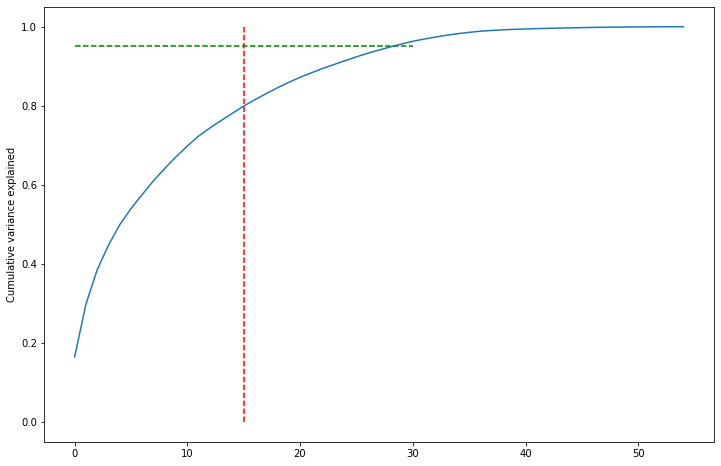

In [585]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [586]:
from sklearn.decomposition import IncrementalPCA

In [587]:
pca_final = IncrementalPCA(n_components=15)

In [588]:
df_train_pca = pca_final.fit_transform(X_train)

In [589]:
df_train_pca.shape

(21326, 15)

In [590]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [591]:
#Plotting the heatmap of the corr matrix

<AxesSubplot:>

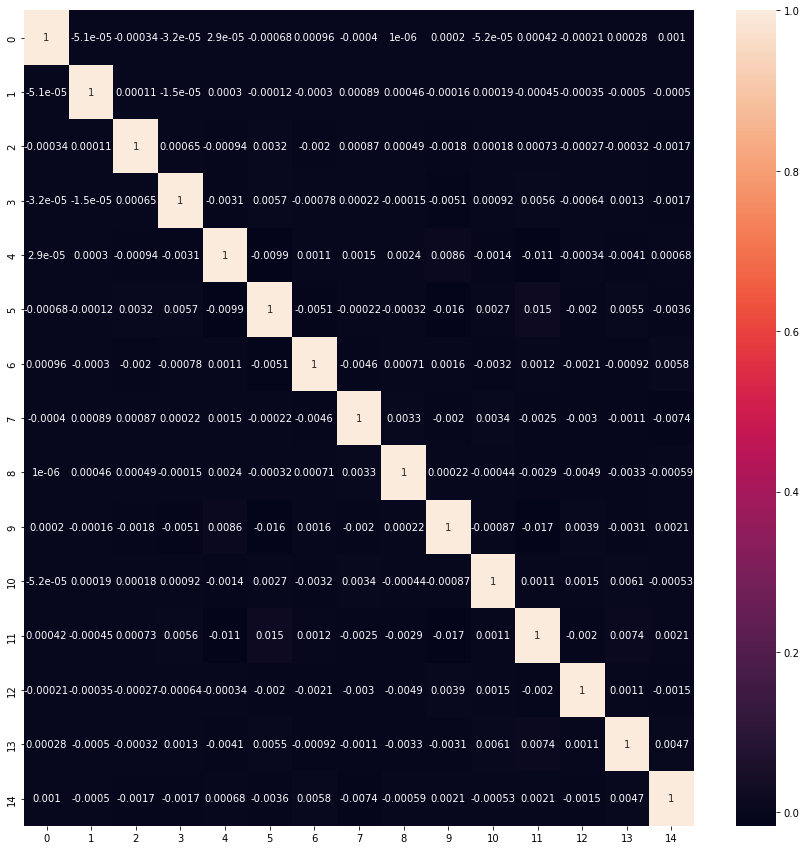

In [592]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [593]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(4838, 15)

In [594]:
X_test=df_test_pca
X_train=df_train_pca

In [595]:
LR = LogisticRegression()
model_pca_LR = LR.fit(X_train, y_train)



In [596]:
y_train_pred = model_pca_LR.predict_proba(X_train)

In [597]:
y_train_pred=pd.DataFrame(y_train_pred)

In [598]:
y_train_pred_final = pd.concat([y_train_pred, y_train], axis=1)

In [599]:
y_train_pred_final

0         1  churn_probability
0      0.202036  0.797964                1.0
1      0.547964  0.452036                0.0
2      0.300411  0.699589                0.0
3      0.540013  0.459987                0.0
4      0.716217  0.283783                0.0
...         ...       ...                ...
21321  0.330825  0.669175                1.0
21322  0.262961  0.737039                1.0
21323  0.341469  0.658531                1.0
21324  0.431980  0.568020                1.0
21325  0.396608  0.603392                1.0

[21326 rows x 3 columns]

In [600]:
y_train_pred_final = y_train_pred_final.rename(columns={0: 'Zero', 1: 'Churn_Prob'})

In [601]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [603]:
print(classification_report(y_train_pred_final.churn_probability, y_train_pred_final.predicted))

              precision    recall  f1-score   support

         0.0       0.67      0.63      0.65     10663
         1.0       0.65      0.69      0.67     10663

    accuracy                           0.66     21326
   macro avg       0.66      0.66      0.66     21326
weighted avg       0.66      0.66      0.66     21326



In [604]:
#Fine Tuning


In [605]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn_probability, y_train_pred_final.Churn_Prob, drop_intermediate = False )

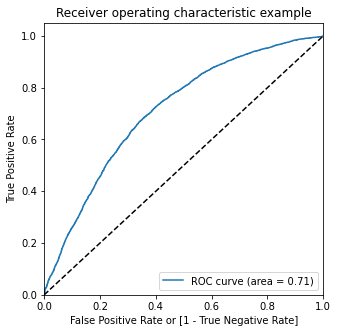

In [606]:
draw_roc(y_train_pred_final.churn_probability, y_train_pred_final.Churn_Prob)

In [607]:
numbers = [float(j)/10 for j in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Zero  Churn_Prob  churn_probability  predicted  0.0  0.1  0.2  0.3  \
0  0.202036    0.797964                1.0          1    1    1    1    1   
1  0.547964    0.452036                0.0          0    1    1    1    1   
2  0.300411    0.699589                0.0          1    1    1    1    1   
3  0.540013    0.459987                0.0          0    1    1    1    1   
4  0.716217    0.283783                0.0          0    1    1    1    0   

   0.4  0.5  0.6  0.7  0.8  0.9  
0    1    1    1    1    0    0  
1    1    0    0    0    0    0  
2    1    1    1    0    0    0  
3    1    0    0    0    0    0  
4    0    0    0    0    0    0

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.508816  0.995592  0.022039
0.2   0.2  0.544406  0.982838  0.105974
0.3   0.3  0.596549  0.936885  0.256213
0.4   0.4  0.645362  0.847791  0.442934
0.5   0.5  0.662759  0.692019  0.633499
0.6   0.6  0.630779  0.467036  0.794523
0.7   0.7  0.564663  0.201913  0.927413
0.8   0.8  0.516459  0.045766  0.987152
0.9   0.9  0.499906  0.000188  0.999625


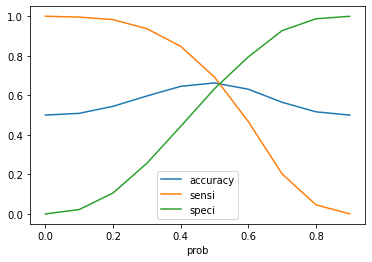

In [608]:

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn_probability, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [609]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

In [610]:
metrics.accuracy_score(y_train_pred_final.churn_probability, y_train_pred_final.final_predicted)

0.6576010503610616

In [611]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_pred_final.churn_probability,y_train_pred_final.final_predicted)

0.7747350651786552

In [612]:
## PCA - Decision Tree

In [613]:
dt_base = DecisionTreeClassifier(random_state=42)

In [614]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [615]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [616]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[10663,     0],
       [    0, 10663]], dtype=int64)

In [617]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

1.0

In [618]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
confusion

array([[3765,  806],
       [ 199,   68]], dtype=int64)

In [619]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.2546816479400749

In [620]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10663
         1.0       1.00      1.00      1.00     10663

    accuracy                           1.00     21326
   macro avg       1.00      1.00      1.00     21326
weighted avg       1.00      1.00      1.00     21326



In [621]:
print('Decision Tree With no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      4571
         1.0       0.08      0.25      0.12       267

    accuracy                           0.79      4838
   macro avg       0.51      0.54      0.50      4838
weighted avg       0.90      0.79      0.84      4838



In [622]:
#Hyper Parameter Tuning for decision Tree
dt = DecisionTreeClassifier(random_state=42)

In [623]:
#Params to be tuned
params = {
    "max_depth": [2,3,5,10,20,30,40,50],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [624]:
# Performing 5 fold CV using RECALL as scoring parameter
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [625]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [626]:
grid_search.best_score_

0.8700184890521415

In [627]:
# Assigning tuned hyper parameter model to dt_best
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [628]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [629]:
print('Decision Tree With Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Decision Tree With Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.88      0.70      0.78     10663
         1.0       0.75      0.91      0.82     10663

    accuracy                           0.80     21326
   macro avg       0.82      0.80      0.80     21326
weighted avg       0.82      0.80      0.80     21326



In [630]:
print('Decision Tree With Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Decision Tree With Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.96      0.64      0.77      4571
         1.0       0.08      0.53      0.14       267

    accuracy                           0.63      4838
   macro avg       0.52      0.58      0.45      4838
weighted avg       0.91      0.63      0.73      4838



In [631]:
## Model 7 - Random Forest - PCA

In [632]:
rf_base = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1)

In [633]:
rf_base.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [634]:
y_train_pred = rf_base.predict(X_train)
y_test_pred = rf_base.predict(X_test)

In [635]:
print('Random Forest with no Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))


Random Forest with no Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10663
         1.0       1.00      1.00      1.00     10663

    accuracy                           1.00     21326
   macro avg       1.00      1.00      1.00     21326
weighted avg       1.00      1.00      1.00     21326



In [636]:
print('Random Forest with no Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with no Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94      4571
         1.0       0.10      0.13      0.11       267

    accuracy                           0.88      4838
   macro avg       0.52      0.53      0.52      4838
weighted avg       0.90      0.88      0.89      4838



In [637]:
#Hyper Parameter Tuning for Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [638]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [639]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           verbose=1, scoring="accuracy")

In [640]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [641]:
grid_search.best_score_

0.9025608192370328

In [642]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [643]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [644]:
print('Random Forest with  Hyper-Parameter Tuning 0n Train Set')
print(classification_report(y_train, y_train_pred))

Random Forest with  Hyper-Parameter Tuning 0n Train Set
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     10663
         1.0       0.95      0.99      0.97     10663

    accuracy                           0.97     21326
   macro avg       0.97      0.97      0.97     21326
weighted avg       0.97      0.97      0.97     21326



In [645]:
print('Random Forest with  Hyper-Parameter Tuning 0n Test Set')
print(classification_report(y_test, y_test_pred))

Random Forest with  Hyper-Parameter Tuning 0n Test Set
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      4571
         1.0       0.09      0.22      0.13       267

    accuracy                           0.84      4838
   macro avg       0.52      0.55      0.52      4838
weighted avg       0.90      0.84      0.87      4838



In [ ]:
############### Code for Solution file ## PLEASE IGNORE##

In [848]:
#### For Solution file#### LR-Non pca as it has the highest recall
# Also the test.csv was run through the pipeline to match the data used to build the LR model

In [817]:
X_test=pd.read_csv('tbscaled.csv')

In [818]:
num_cols4=['monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'monthly_3g_6',
 'sachet_3g_6',
 'sachet_3g_7',
 'aon',
 'arpu_average',
 'onnet_mou_average',
 'roam_ic_mou_average',
 'loc_og_t2t_mou_average',
 'loc_og_t2m_mou_average',
 'loc_og_t2f_mou_average',
 'loc_og_t2c_mou_average',
 'std_og_t2f_mou_average',
 'isd_og_mou_average',
 'spl_og_mou_average',
 'og_others_average',
 'loc_ic_t2t_mou_average',
 'loc_ic_t2f_mou_average',
 'std_ic_t2t_mou_average',
 'std_ic_t2m_mou_average',
 'std_ic_t2f_mou_average',
 'spl_ic_mou_average',
 'isd_ic_mou_average',
 'ic_others_average',
 'total_rech_num_average',
 'max_rech_amt_average',
 'vol_2g_mb_average']

In [819]:
X_test[num_cols4] = scaler.transform(X_test[num_cols4])

In [820]:
X_test_1 = X_test[col]

In [821]:
X_test_sm = sm.add_constant(X_test_1)

In [822]:
y_test_pred = res.predict(X_test_sm)

In [823]:
y_test_pred = y_test_pred.values.reshape(-1)

In [824]:
y_test_pred_final = pd.DataFrame({'Churn_Prob':y_test_pred})

In [825]:
y_test_pred_final.head()

Churn_Prob
0    0.502196
1    0.251964
2    0.678141
3    0.526567
4    0.679382

In [826]:
 y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

In [827]:
y_test_pred_final.head(20)

Churn_Prob  final_predicted
0     0.502196                1
1     0.251964                0
2     0.678141                1
3     0.526567                1
4     0.679382                1
5     0.694190                1
6     0.576950                1
7     0.567803                1
8     0.790340                1
9     0.641447                1
10    0.466522                1
11    0.579599                1
12    0.646546                1
13    0.343807                0
14    0.592086                1
15    0.647920                1
16    0.400600                0
17    0.462395                1
18    0.636713                1
19    0.614566                1

In [828]:
solution=pd.read_csv('solution.csv')

In [829]:
solution

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  1
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  0
29998  99997                  0
29999  99998                  0

[30000 rows x 2 columns]

In [830]:
hold=y_test_pred_final['final_predicted']

In [831]:
a=solution.join(hold)

In [832]:
a

id  churn_probability  final_predicted
0      69999                  0                1
1      70000                  0                0
2      70001                  1                1
3      70002                  0                1
4      70003                  0                1
...      ...                ...              ...
29995  99994                  0                0
29996  99995                  0                1
29997  99996                  0                1
29998  99997                  0                1
29999  99998                  0                1

[30000 rows x 3 columns]

In [850]:
# Just to check what the recall woould be the  Churn_Probability given in the files was the expected y. 

In [833]:
print(classification_report(a['churn_probability'], a['final_predicted']))

              precision    recall  f1-score   support

           0       0.96      0.36      0.52     26941
           1       0.13      0.88      0.23      3059

    accuracy                           0.41     30000
   macro avg       0.55      0.62      0.38     30000
weighted avg       0.88      0.41      0.49     30000



In [834]:
# Using LR we got 88 percent Recall

In [835]:
a

id  churn_probability  final_predicted
0      69999                  0                1
1      70000                  0                0
2      70001                  1                1
3      70002                  0                1
4      70003                  0                1
...      ...                ...              ...
29995  99994                  0                0
29996  99995                  0                1
29997  99996                  0                1
29998  99997                  0                1
29999  99998                  0                1

[30000 rows x 3 columns]

In [836]:
a.drop('churn_probability',axis=1,inplace=True)

In [838]:
a.head()

id  final_predicted
0  69999                1
1  70000                0
2  70001                1
3  70002                1
4  70003                1

In [839]:
a=a.rename(columns= {'final_predicted':'churn_probability'})


In [841]:
a.head()

id  churn_probability
0  69999                  1
1  70000                  0
2  70001                  1
3  70002                  1
4  70003                  1

In [845]:
a.to_csv('solution1.csv', index=False)